
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Data Wrangling


In [5]:


tsDataWrangling_obj.read_data( 'input/RNN_time_DELAYS_2000_PerCast_rcalix.csv' ) 
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS[tsDataWrangling_obj.l_new]

tsDataWrangling_obj.read_df_Dates_Map('input/RC_CNUM_RNN_time_DELAYS_2000_PerCast_rcalix.csv')
tsDataWrangling_obj.df_Dates_Map = tsDataWrangling_obj.df_Dates_Map[ tsDataWrangling_obj.l_map_dates ]

print( tsDataWrangling_obj.for_RNN_data_CIVS.shape   )
print( tsDataWrangling_obj.df_Dates_Map.shape        )       ## dates and cnum additionally included 

tsDataWrangling_obj.delta_for_RNN_data_CIVS      = tsDataWrangling_obj.for_RNN_data_CIVS.copy()
tsDataWrangling_obj.SI_lookup_for_RNN_data_CIVS  = tsDataWrangling_obj.for_RNN_data_CIVS.copy()

tsDataWrangling_obj.calculateDeltas()
tsDataWrangling_obj.delta_for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS[ tsDataWrangling_obj.l_delta ]
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsDataWrangling_obj.calculateMovingAverage()
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n  = int( tsGPT_obj.for_RNN_data_CIVS.shape[0] )



(1383, 25)
(1383, 27)


In [6]:

## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.cols_list_DF
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.df_Dates_Map
## tsDataWrangling_obj.data_plot_all_columns()
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.delta_for_RNN_data_CIVS


In [7]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1378  0.109500    0.004444  0.762500                4.204430   
1379 -0.116500    0.008900  0.646000                4.208539   
1380  0.008667   -0.037618  0.654667                4.212648   
1381 -0.063000   -0.014340  0.591667                4.217784   
1382  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1378          2169.361647            9297.484543   185.046491   
1379          2169.079601            9312.779010   185.053796   
1380          2168.797556            9303.753420   185.007919   
1381          2168.444999            9333.448101   184.942435   
1382          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
0                       0.0           0.0           0.354        0.16   
1                       0.0           0.0           0.313        0.83   
2                       0.0           0.0           0.360        0.10   
3                       0.0           0.0           0.319        0.34   
4                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1378                    0.0           0.0           0.343        0.30   
1379                    0.0           0.0           0.324        0.30   
1380                    0.0           0.0           0.325        0.16   
1381                    0.0           0.0           0.335        0.26   
1382                    0.0           0.0           0.328        1.08   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
0               21.080431             18.313322             4.131228   
1               20.996415             18.311768             4.133911   
2               20.749627             18.341701             4.137632   
3               20.609259             18.644476             4.142824   
4               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1378            21.039583             18.308225             4.129485   
1379            21.043999             18.308776             4.129674   
1380            21.048415             18.309327             4.129862   
1381            21.053935             18.310016             4.130097   
1382            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
0               54.940123    171.769513    182.533770    148.126483   
1               55.072779    170.595469    183.725050    148.161842   
2               55.375043    167.017421    195.812061    147.562523   
3               55.341884    154.214917    188.028883    147.807509   
4               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1378            55.162782    167.619915    185.900341    148.103530   
1379            55.162767    164.706552    182.408576    148.106012   
1380            55.140373    166.903493    181.684649    148.108493   
1381


## Training Functions


In [8]:


def function_train_rc( train_CIVS_2 ):
    model  = Time_Series_GPT.Time_Series_GPT( tsGPT_obj )   
    model  = model.to(  tsGPT_obj.device   )
    optimizer     = torch.optim.Adam(     model.parameters(), lr = tsGPT_obj.learning_rate   )
    criterion     = nn.MSELoss()
    ## criterion     = nn.HuberLoss(reduction='mean', delta=1.0)

    sdtw_criterion = SoftDTW(use_cuda=True, gamma=0.1)

 
    history       = {'loss': [], 'test_loss': [], 'loss_A': [], 'loss_B': [], 'loss_C': [],
                     'loss_SIM0':[], 'loss_SIM1':[], 'loss_SIM2':[], 'loss_SIM3':[], 
                     'loss_SIM4':[], 'loss_SIM5':[]}
    train_CIVS_tr, x_means, x_standard_devs    = tsGPT_obj.standardize_x_scales( train_CIVS_2 )
    train_CIVS_tr_scaled                       = ( train_CIVS_tr - x_means ) / x_standard_devs
    model.train()
    for batch_i, epoch in enumerate( range(tsGPT_obj.max_iters) ):
        xb, yb    = tsGPT_obj.get_batch( train_CIVS_tr_scaled )
        logits   = model( xb, yb )
        B, T, E  = logits.shape
        ###########################################
        pred           = logits.view( B, T, E )
        y_train        = yb.view(     B, T, E )
        ## print(pred.shape)
        ## print(y_train.shape)
        ###########################################
        loss_change_pred = pred[   :,   :-1,  :] - pred[   :,   1:,  :]
        loss_change_real = y_train[:,   :-1,  :] - y_train[:,   1:,  :]   
        loss_A = 0 # 0.7*criterion(loss_change_pred[:,   :5,  :].reshape(B*5, E ), loss_change_real[:,   :5,  :].reshape(B*5, E ) ) 
        loss_B = 0 # 0.2*criterion(loss_change_pred[:,  5:10, :].reshape(B*5, E ), loss_change_real[:,  5:10, :].reshape(B*5, E ) ) 
        loss_C = 0 # 0.1*criterion( loss_change_pred[:,10:,   :].reshape(B*4, E ), loss_change_real[:, 10:,   :].reshape(B*4, E ) )
        ## loss =  loss_A + loss_B + loss_C 
        ## loss = criterion( loss_change_pred.reshape(B*(T-1), E ), loss_change_real.reshape(B*(T-1), E ) )

        ############################################
        loss_SI    = criterion( loss_change_pred.reshape(B*(T-1), E )[:, 2], loss_change_real.reshape(B*(T-1), E )[:, 2] )
        loss_all   = criterion( loss_change_pred.reshape(B*(T-1), E ),       loss_change_real.reshape(B*(T-1), E )       )

        Curve_SIMs = tsGPT_obj.func_get_Curve_SIMs( loss_change_pred.reshape(B, (T-1), E ), loss_change_real.reshape(B, (T-1), E )  )

        #######################################################
        
        ## Curve_SIMs = tsGPT_obj.MySoftmax(  Curve_SIMs[ [ 0, 3] ]  )
        ## loss = (0.00001)*loss_SI + Curve_SIMs[3]               

        #######################################################
        # Just like any torch.nn.xyzLoss()
        ## print( loss_change_pred.reshape(B, (T-1), E )[:,:, 2:3 ].shape )
        loss = sdtw_criterion(loss_change_pred.reshape(B,(T-1), E )[:,:, 2:3], loss_change_real.reshape(B, (T-1),E )[:, :, 2:3] )  
        
       
        #######################################################
        optimizer.zero_grad( set_to_none=True )    
        loss = loss.mean()  ## Aggregate and call backward() # sdtw_criterion only
        loss.backward()
        optimizer.step()
        #######################################################
        history['loss'].append(      loss.item()  )
        history['loss_A'].append( 0 ) # loss_SI.item()  )
        history['loss_B'].append( loss_all.item()  )
        history['loss_C'].append( 0 ) # loss_C.item()  )
        history['loss_SIM0'].append( Curve_SIMs[0] )
        history['loss_SIM1'].append( Curve_SIMs[1] )
        #history['loss_SIM2'].append( Curve_SIMs[2] )
        #history['loss_SIM3'].append( Curve_SIMs[3] )
        #history['loss_SIM4'].append( Curve_SIMs[4] )
        #history['loss_SIM5'].append( Curve_SIMs[5] )
        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item()    )
            print("seq length of pred = ",  pred.shape[1]  )
            print(Curve_SIMs)
            print( [ loss_SI , loss_all ] )
    tsGPT_obj.plot_losses_training( history )
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled        




## Train on Train, Test on Test



## Run 1


In [9]:

batch_size, len_x, len_y, dims = 8, 15, 12, 5
x = torch.rand((batch_size, len_x, dims), requires_grad=True)
y = torch.rand((batch_size, len_y, dims))
x.shape

x[1, 1, :5]


tensor([0.2661, 0.1108, 0.7383, 0.5072, 0.4070], grad_fn=<SelectBackward0>)

In [10]:

x[1, 1, 2:3]


tensor([0.7383], grad_fn=<SliceBackward0>)

In [11]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  23.078773498535156
seq length of pred =  30
[ 3.73858332  2.56185546 16.01251933 31.66373265  1.12561618  0.60273305]
[tensor(2.2512, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3385, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  22.03082847595215
seq length of pred =  30
[ 3.70916044  2.50961383 16.49187056 31.71660915  1.13278519  0.60847177]
[tensor(2.2656, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3252, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  23.344223022460938
seq length of pred =  30
[ 3.77330715  2.50383655 16.24800396 32.6928824   1.15451276  0.61946189]
[tensor(2.3090, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3369, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  22.638526916503906
seq length of pred =  30
[ 3.69338702  2.52935415 15.52510896 31.4869766   1.05930023  0.5918122 ]
[tensor(2.1186, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3275, device='cud

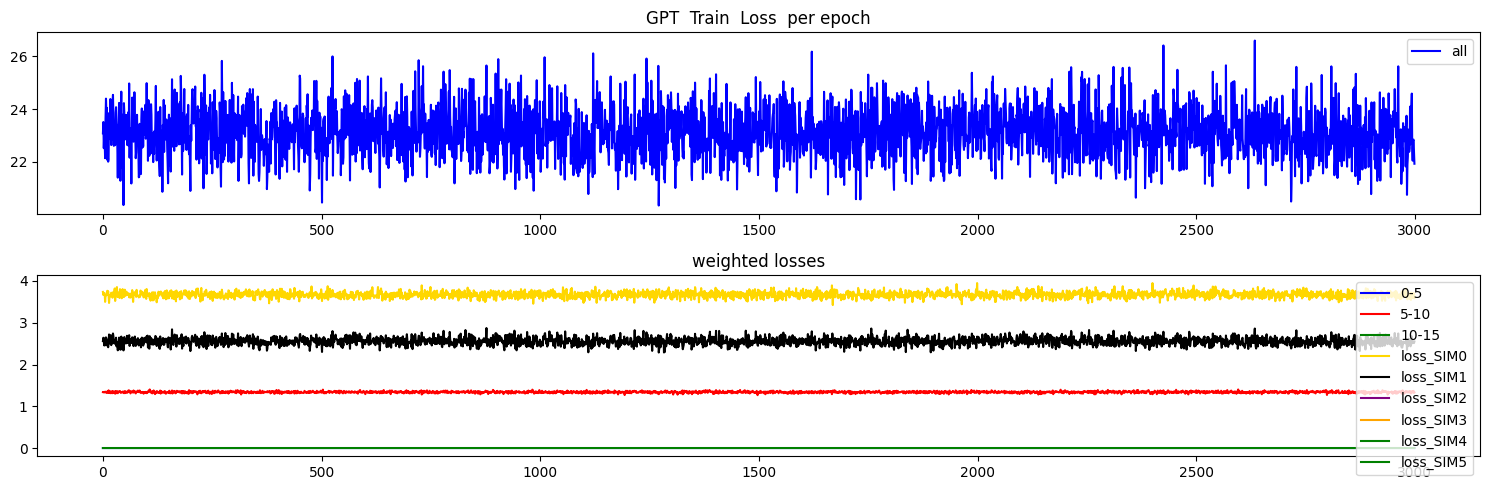

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.1242891326546669
Test MSE Loss - SI only 0-5:  0.03022555634379387
Test MSE Loss - SI only 5-10:  0.23138602077960968
Test MSE Loss - SI only 10-15:  0.06435756385326385
mae, mse, rmse, mape, mspe, rse, corr
(0.25759912, 0.12428913, 0.35254663, 4.1459546, 115.68324, 1.6371244)
Testing R**2 - SI only:  -1.6801758282859751
Testing R**2 - SI only:  -1.6801758282859751
Testing R**2 - All features:  0.9906796997932985
Testing R**2 - (f2) - SI full:  -5.766743227105676


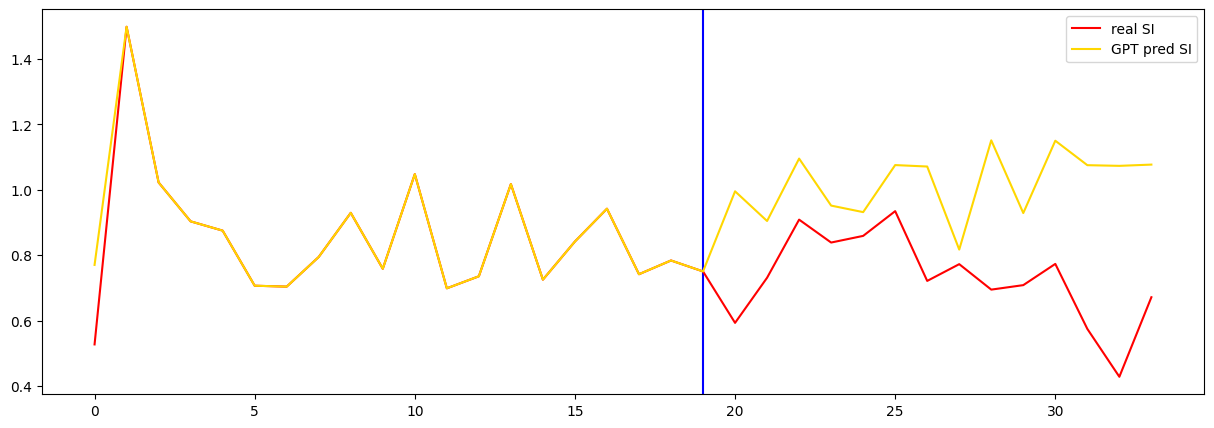

In [12]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  9.565326690673828
seq length of pred =  30
[ 4.9539536   1.97623988  9.15969456 17.66650042  0.36791802  0.30605062]
[tensor(0.7358, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1981, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  10.365511894226074
seq length of pred =  30
[ 5.33964209  2.03492214  9.29945213 18.04500876  0.39099931  0.31390089]
[tensor(0.7820, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2258, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  16.35276985168457
seq length of pred =  30
[ 5.69213099  2.73832018 10.57334133 19.45788744  0.51406825  0.33683273]
[tensor(1.0281, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3861, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  9.787787437438965
seq length of pred =  30
[ 5.38314923  2.00158706  9.0484348  17.45076042  0.35940711  0.30185206]
[tensor(0.7188, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2130, device='cuda:

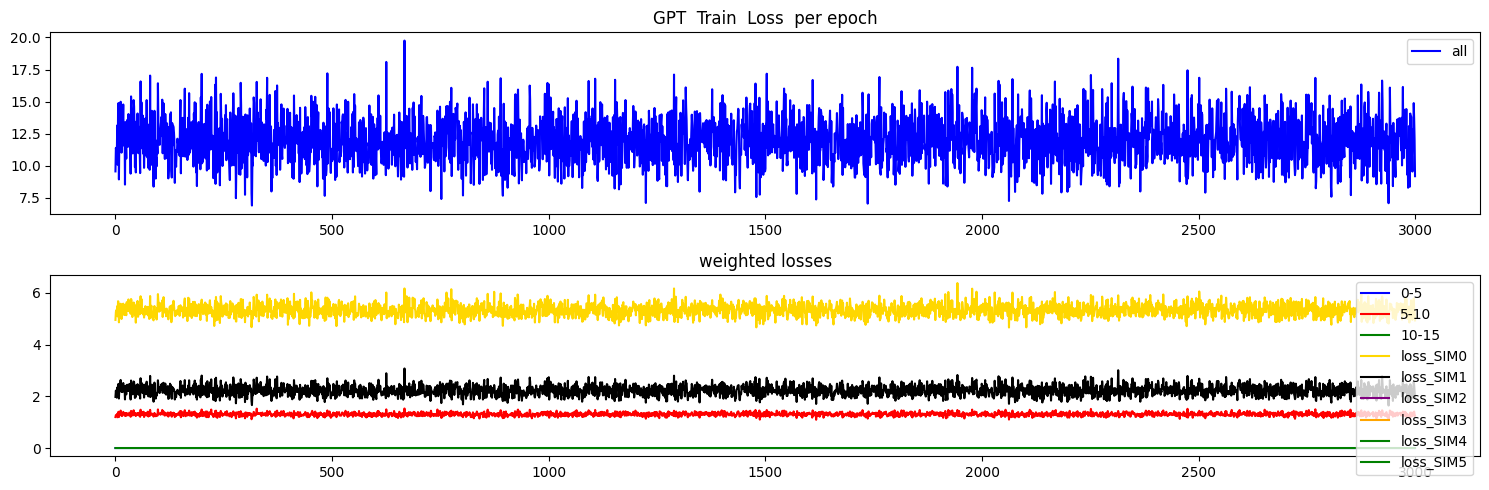

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.1256435066461563
Test MSE Loss - SI only 0-5:  0.03022555634379387
Test MSE Loss - SI only 5-10:  0.23138602077960968
Test MSE Loss - SI only 10-15:  0.06435756385326385
mae, mse, rmse, mape, mspe, rse, corr
(0.2614103, 0.12564352, 0.3544623, 3.9380636, 111.588554, 1.6460202)
Testing R**2 - SI only:  -1.7093818185829055
Testing R**2 - SI only:  -1.7093818185829055
Testing R**2 - All features:  0.9736320915380537
Testing R**2 - (f2) - SI full:  -2.9054296204610504


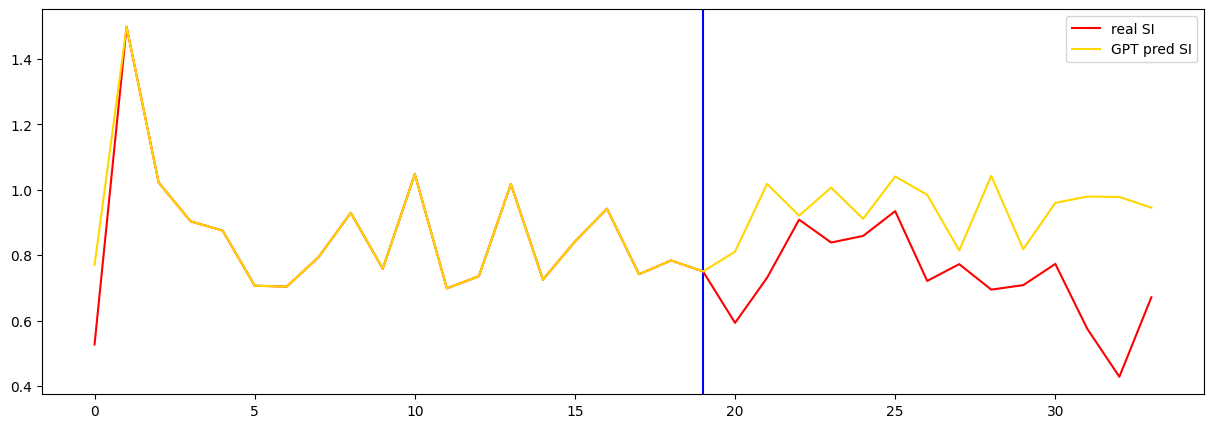

In [13]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  21.53563690185547
seq length of pred =  30
[ 3.50521327  2.46244566 15.58772235 29.19585338  0.90426773  0.5279214 ]
[tensor(1.8085, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0644, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  21.155797958374023
seq length of pred =  30
[ 3.53104626  2.45996642 15.26580936 29.03734167  0.88039024  0.52303764]
[tensor(1.7608, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0730, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  20.834850311279297
seq length of pred =  30
[ 3.46809187  2.42986943 15.56308415 29.45027415  0.92985797  0.53440144]
[tensor(1.8597, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0533, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  22.706893920898438
seq length of pred =  30
[ 3.6343049   2.50454374 15.49777061 29.95111126  0.95375465  0.54401093]
[tensor(1.9075, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1645, device='cud

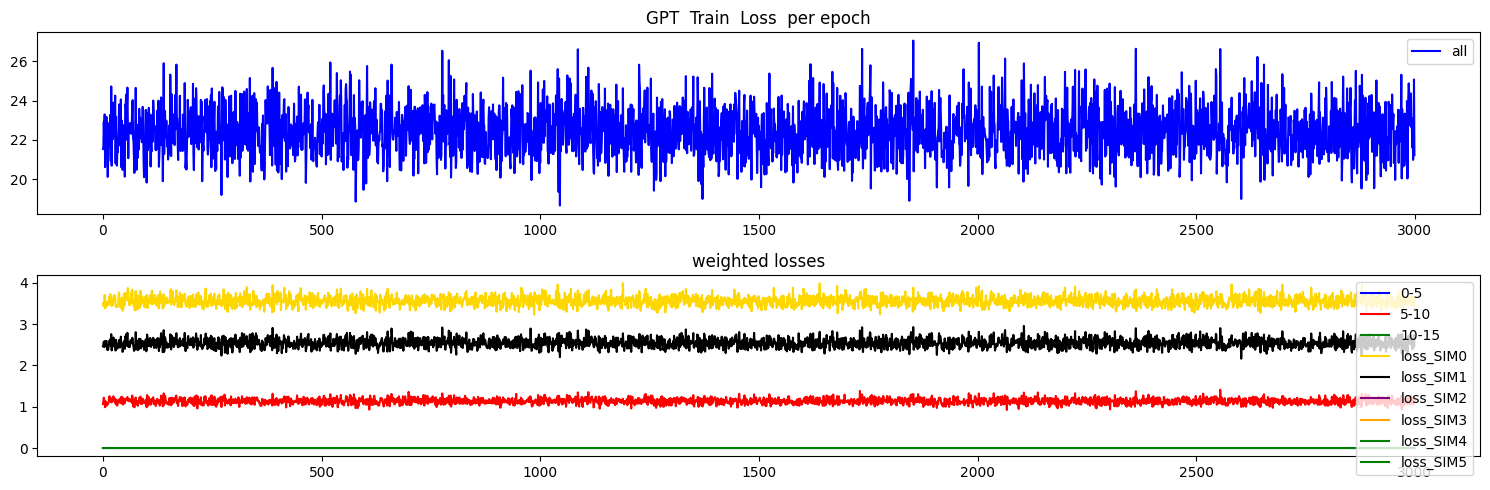

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.12355449795722961
Test MSE Loss - SI only 0-5:  0.03022555634379387
Test MSE Loss - SI only 5-10:  0.23138602077960968
Test MSE Loss - SI only 10-15:  0.06435756385326385
mae, mse, rmse, mape, mspe, rse, corr
(0.24482132, 0.1235545, 0.3515032, 3.684689, 108.893456, 1.6322789)
Testing R**2 - SI only:  -1.664334418334061
Testing R**2 - SI only:  -1.664334418334061
Testing R**2 - All features:  0.9898984463241163
Testing R**2 - (f2) - SI full:  -1.5961308257445372


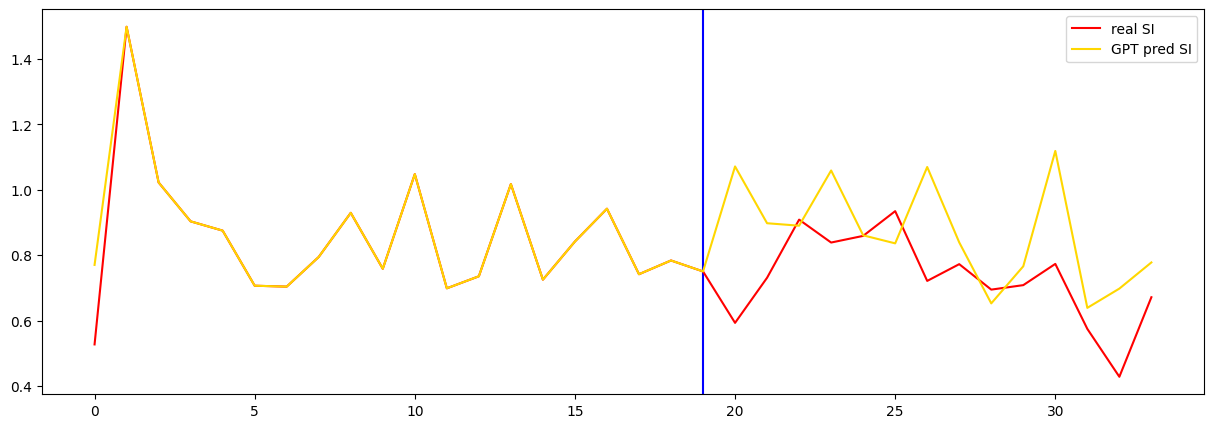

In [14]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  7.9107346534729
seq length of pred =  30
[ 3.90986428  1.81408672  9.89473717 18.61427681  0.35760417  0.32273764]
[tensor(0.7152, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0804, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  8.416997909545898
seq length of pred =  30
[ 4.04180763  1.7977739  10.13854772 19.09928322  0.3913252   0.33381976]
[tensor(0.7827, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0859, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  9.575051307678223
seq length of pred =  30
[ 4.30273874  1.98614996 10.17359501 19.33055085  0.42691444  0.33864635]
[tensor(0.8538, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0425, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  10.443796157836914
seq length of pred =  30
[ 4.27721586  2.06739805 10.40669628 19.8172349   0.44577237  0.3448229 ]
[tensor(0.8915, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2273, device='cuda:0'

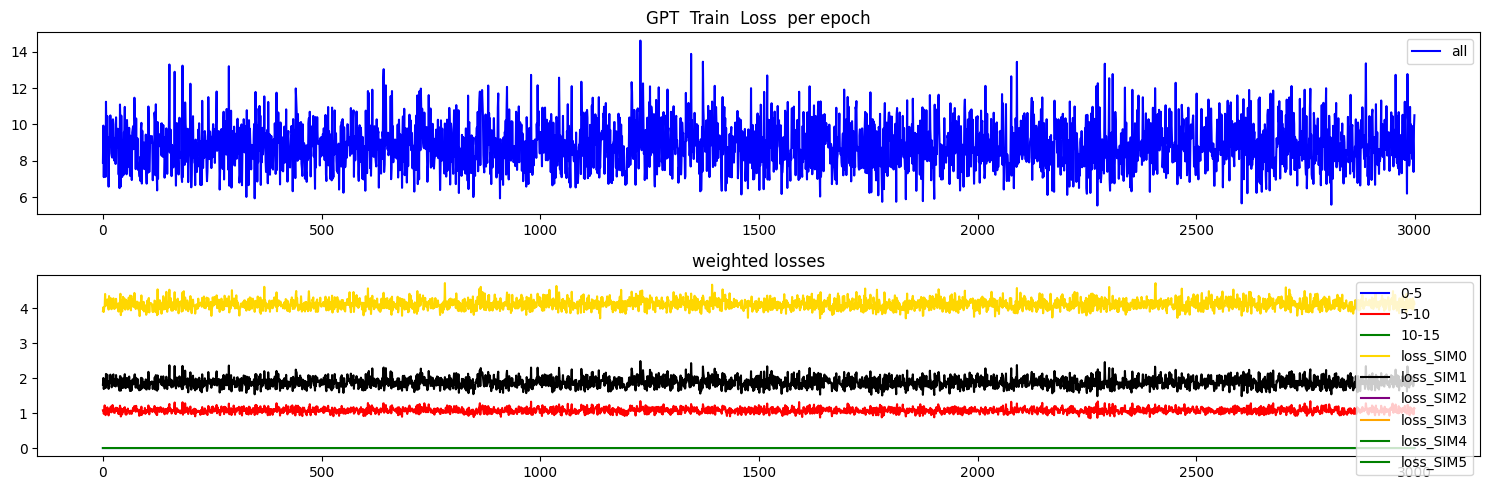

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.11916729807853699
Test MSE Loss - SI only 0-5:  0.030225560069084167
Test MSE Loss - SI only 5-10:  0.23138602077960968
Test MSE Loss - SI only 10-15:  0.06435756385326385
mae, mse, rmse, mape, mspe, rse, corr
(0.23533894, 0.1191673, 0.34520617, 3.4353132, 107.52403, 1.6030372)
Testing R**2 - SI only:  -1.5697281548100985
Testing R**2 - SI only:  -1.5697281548100985
Testing R**2 - All features:  0.971691561943382
Testing R**2 - (f2) - SI full:  -0.5991002259450275


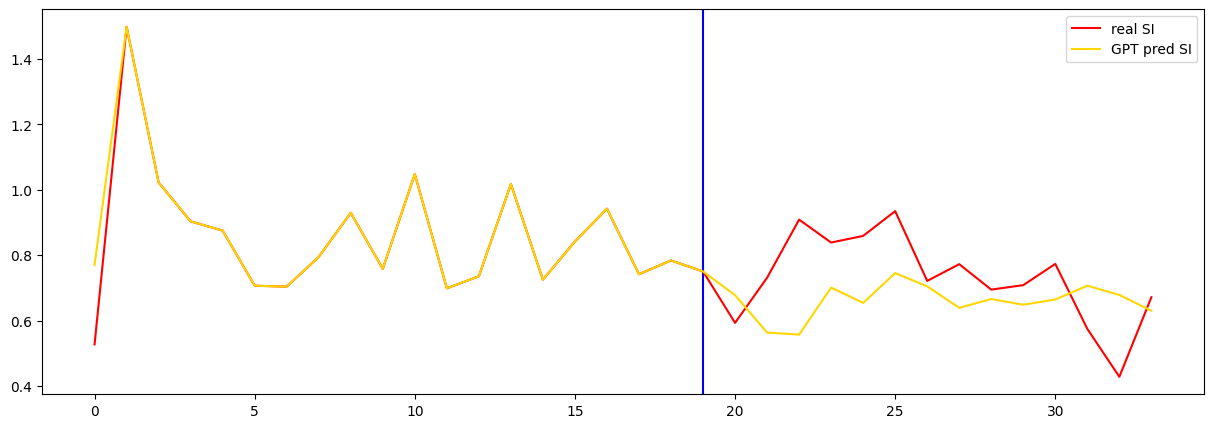

In [15]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 2


In [16]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  15.810087203979492
seq length of pred =  30
[ 3.95837518  2.37241726 13.77556202 25.29149711  0.655514    0.4447905 ]
[tensor(1.3110, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3413, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  13.56291389465332
seq length of pred =  30
[ 3.58568272  2.07419785 13.24489621 24.50959154  0.5738545   0.42707989]
[tensor(1.1477, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2415, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  13.497175216674805
seq length of pred =  30
[ 3.55043107  2.02479624 13.43278599 24.88339195  0.59771402  0.43677794]
[tensor(1.1954, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2531, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  14.775007247924805
seq length of pred =  30
[ 3.84395845  2.1876716  13.22219593 25.50122483  0.61750314  0.44437802]
[tensor(1.2350, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2907, device='cud

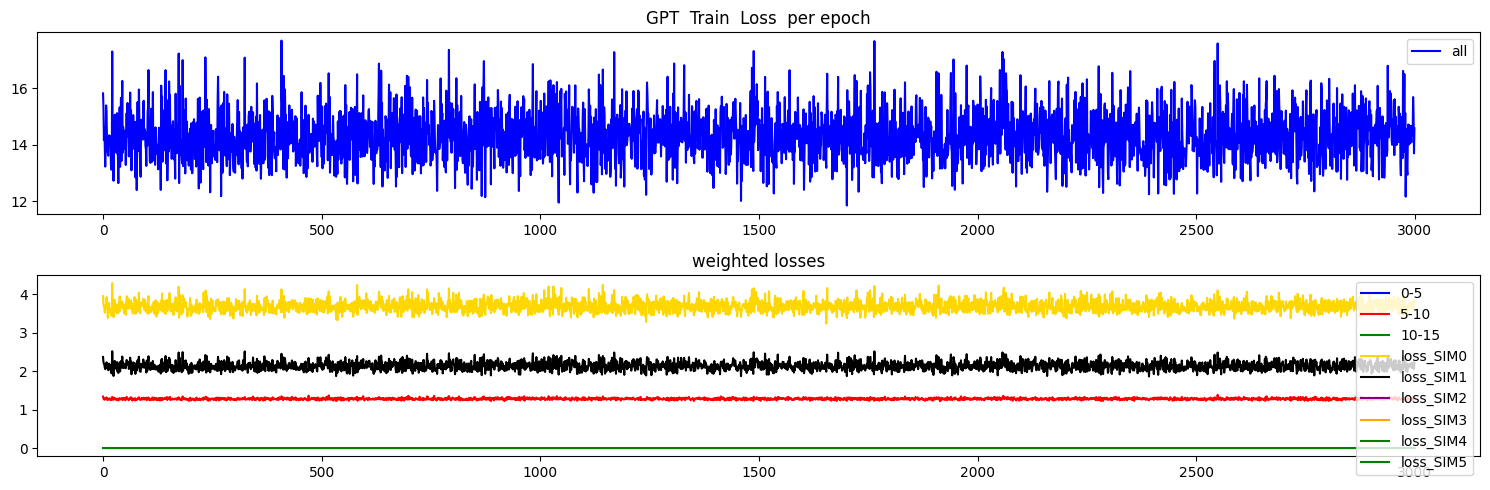

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.12791405618190765
Test MSE Loss - SI only 0-5:  0.14645998179912567
Test MSE Loss - SI only 5-10:  0.0973384901881218
Test MSE Loss - SI only 10-15:  0.024830592796206474
mae, mse, rmse, mape, mspe, rse, corr
(0.28713483, 0.12791404, 0.35765073, 3.8865845, 70.10705, 1.4555348)
Testing R**2 - SI only:  -1.118581650488065
Testing R**2 - SI only:  -1.118581650488065
Testing R**2 - All features:  0.85283898219578
Testing R**2 - (f2) - SI full:  -0.5756427825724098


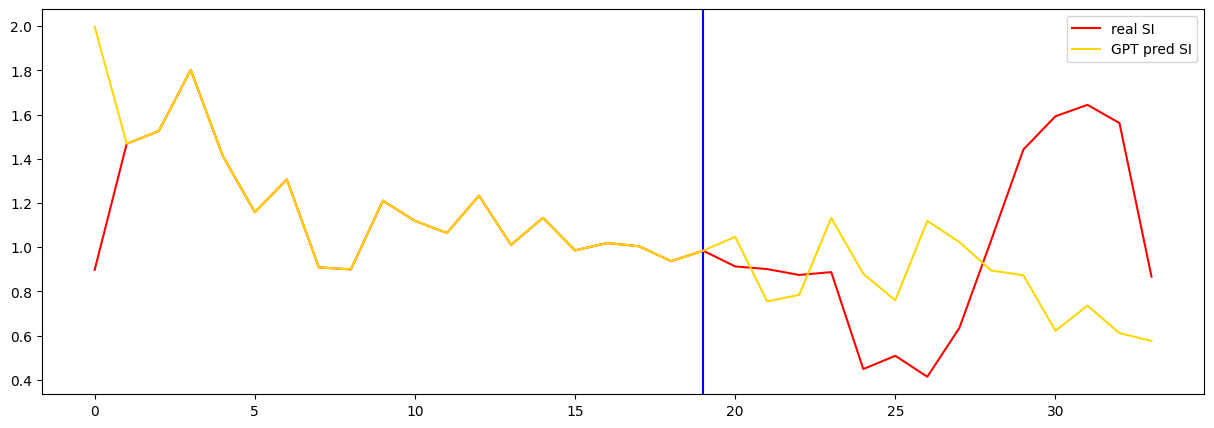

In [17]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  14.514896392822266
seq length of pred =  30
[ 3.58032054  2.20343159 14.44913867 26.13552883  0.70862725  0.46595751]
[tensor(1.4173, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0890, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  14.863262176513672
seq length of pred =  30
[ 3.78020685  2.1829709  14.91560881 25.8301888   0.71985762  0.46486589]
[tensor(1.4397, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0531, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  14.403684616088867
seq length of pred =  30
[ 3.77181632  2.05049993 14.64862774 25.86705728  0.67916035  0.45927595]
[tensor(1.3583, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0659, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  15.630377769470215
seq length of pred =  30
[ 3.52238129  2.26541224 15.24032402 26.72269545  0.73760737  0.4732863 ]
[tensor(1.4752, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1206, device='cu

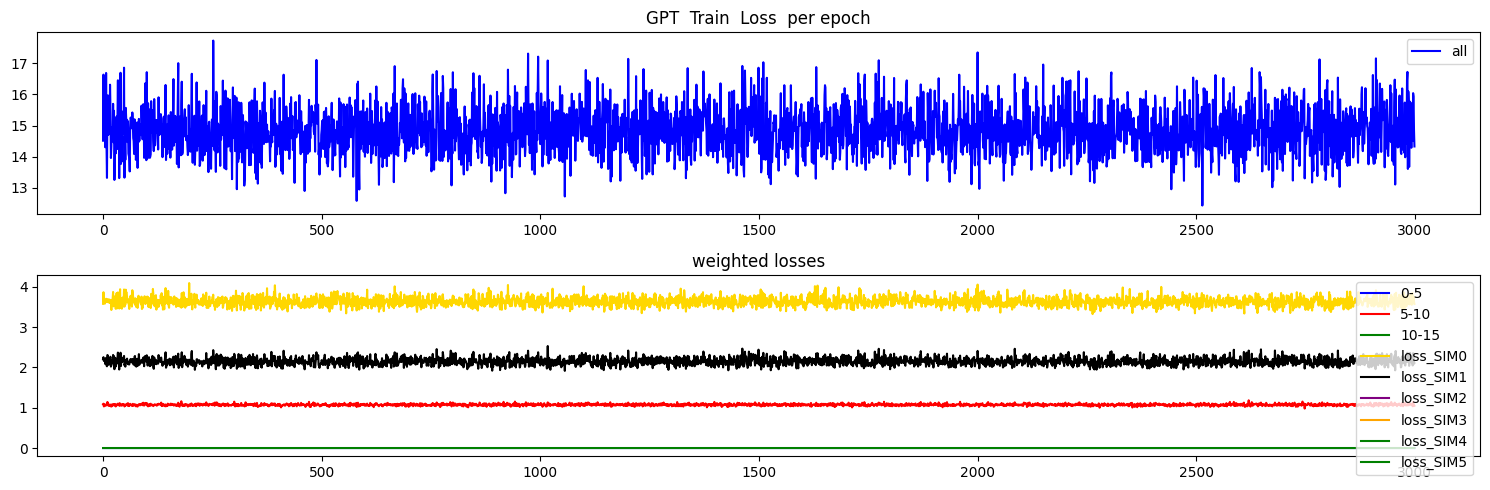

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.1139853298664093
Test MSE Loss - SI only 0-5:  0.14645998179912567
Test MSE Loss - SI only 5-10:  0.0973384827375412
Test MSE Loss - SI only 10-15:  0.024830592796206474
mae, mse, rmse, mape, mspe, rse, corr
(0.2636631, 0.113985315, 0.3376171, 3.2961314, 62.683804, 1.3740038)
Testing R**2 - SI only:  -0.8878865441844213
Testing R**2 - SI only:  -0.8878865441844213
Testing R**2 - All features:  0.8604121818729412
Testing R**2 - (f2) - SI full:  -0.4487961435951362


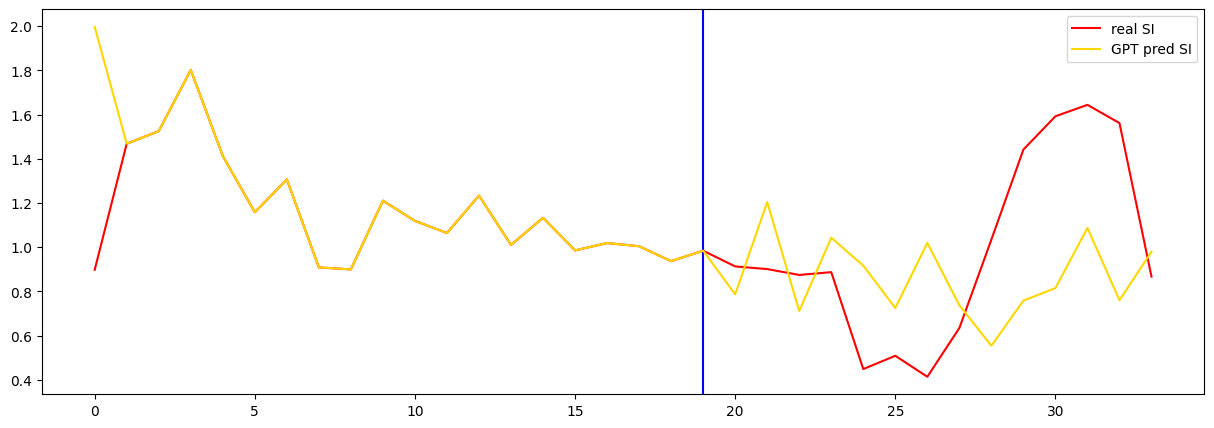

In [18]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  15.657746315002441
seq length of pred =  30
[ 3.65603179  2.18097545 15.1492018  26.36542552  0.69093846  0.46383748]
[tensor(1.3819, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1053, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  15.880294799804688
seq length of pred =  30
[ 3.80924635  2.13263194 15.10012317 26.2623179   0.66559226  0.46086811]
[tensor(1.3312, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0468, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  18.086135864257812
seq length of pred =  30
[ 3.81419409  2.39605845 15.05457148 26.13230054  0.71054749  0.46194838]
[tensor(1.4211, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1738, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  15.386402130126953
seq length of pred =  30
[ 3.85905376  2.17529692 14.49473042 25.82227236  0.64219559  0.45000596]
[tensor(1.2844, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0726, device='cu

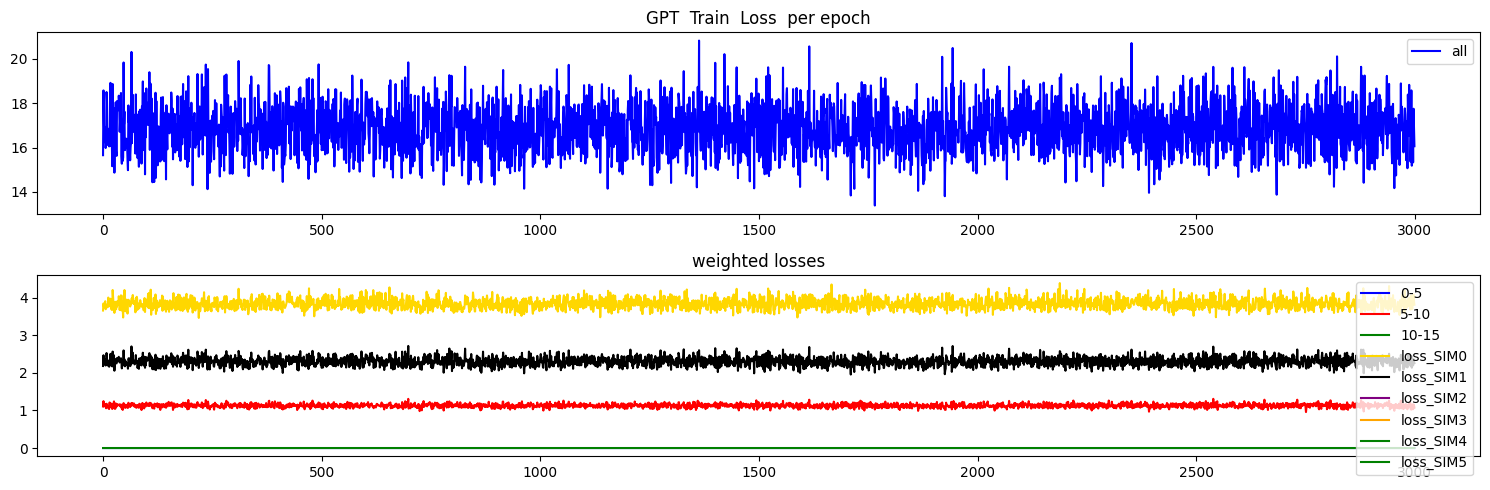

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.11240062117576599
Test MSE Loss - SI only 0-5:  0.14645998179912567
Test MSE Loss - SI only 5-10:  0.0973384901881218
Test MSE Loss - SI only 10-15:  0.024830592796206474
mae, mse, rmse, mape, mspe, rse, corr
(0.26957086, 0.11240062, 0.33526203, 3.5514894, 65.22903, 1.3644192)
Testing R**2 - SI only:  -0.8616399891511088
Testing R**2 - SI only:  -0.8616399891511088
Testing R**2 - All features:  0.8284867556126583
Testing R**2 - (f2) - SI full:  -0.34303944162701105


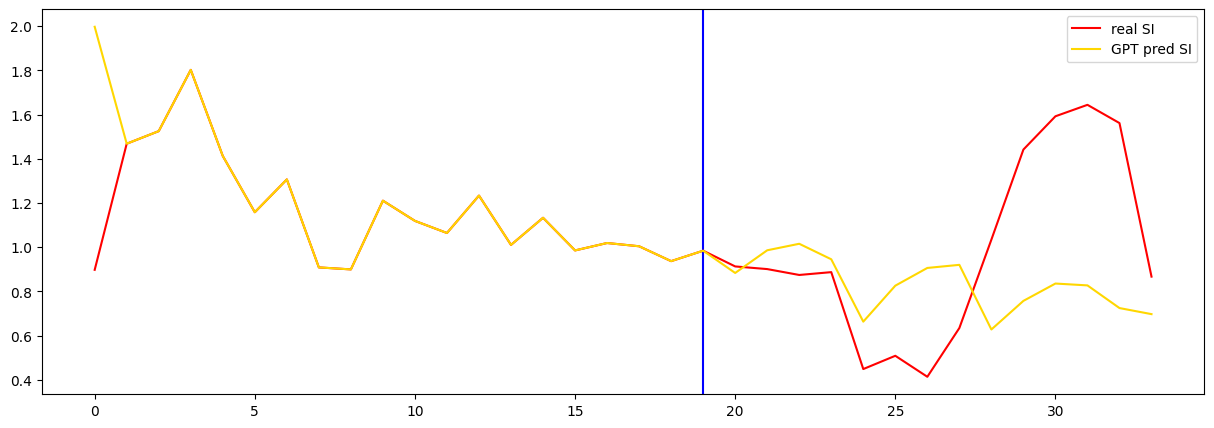

In [19]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  12.547515869140625
seq length of pred =  30
[ 3.98338799  2.00879765 11.78578191 24.46707614  0.61756771  0.43658148]
[tensor(1.2351, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0996, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  15.860252380371094
seq length of pred =  30
[ 4.28768699  2.25619838 11.51312674 24.55893846  0.61957439  0.43219568]
[tensor(1.2391, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1284, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  14.600943565368652
seq length of pred =  30
[ 4.20760673  2.28039915 12.12890719 24.40069555  0.62598951  0.42970491]
[tensor(1.2520, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0674, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  13.17989444732666
seq length of pred =  30
[ 3.81520967  2.13538892 11.60396104 24.21632207  0.602141    0.42884794]
[tensor(1.2043, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0892, device='cud

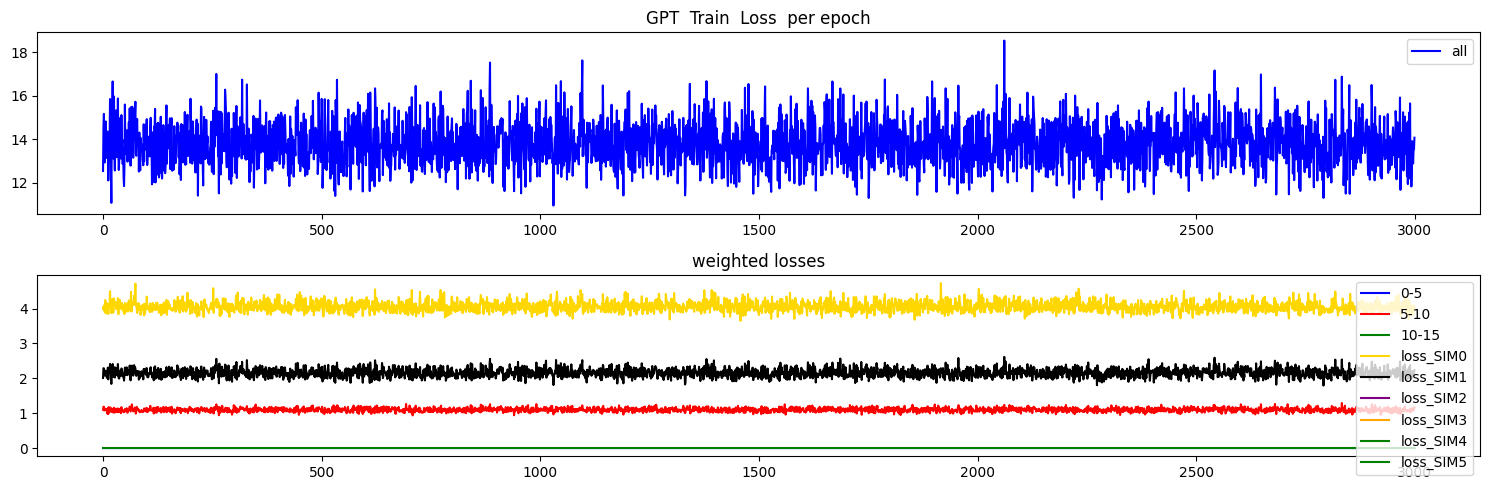

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.10735303908586502
Test MSE Loss - SI only 0-5:  0.14645998179912567
Test MSE Loss - SI only 5-10:  0.0973384901881218
Test MSE Loss - SI only 10-15:  0.024830592796206474
mae, mse, rmse, mape, mspe, rse, corr
(0.253102, 0.10735304, 0.32764775, 3.2855854, 64.3467, 1.3334314)
Testing R**2 - SI only:  -0.7780392956421047
Testing R**2 - SI only:  -0.7780392956421047
Testing R**2 - All features:  0.8780752414219584
Testing R**2 - (f2) - SI full:  -0.3990283234811287


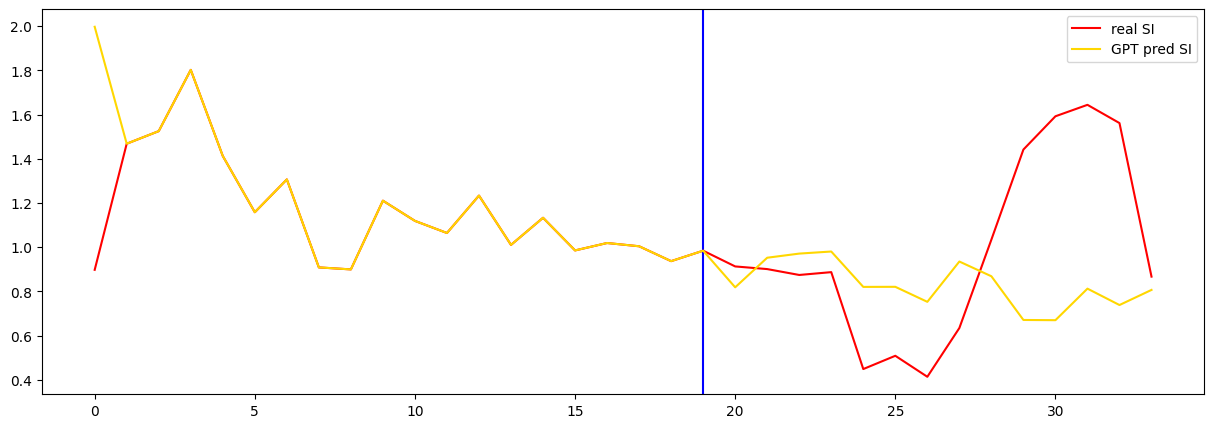

In [20]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 3


In [21]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  17.910905838012695
seq length of pred =  30
[ 4.28083985  2.59978847 16.91778168 28.92219879  0.87869701  0.51958567]
[tensor(1.7574, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3202, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  17.780073165893555
seq length of pred =  30
[ 4.3245841   2.51128253 16.2639343  28.30200861  0.84956511  0.50847165]
[tensor(1.6991, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3534, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  17.807899475097656
seq length of pred =  30
[ 4.51896137  2.55634837 16.97368902 28.88315417  0.88521638  0.51972528]
[tensor(1.7704, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3498, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  17.28622817993164
seq length of pred =  30
[ 4.17878346  2.48075032 15.72980037 27.17019802  0.78170103  0.48372417]
[tensor(1.5634, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2516, device='cud

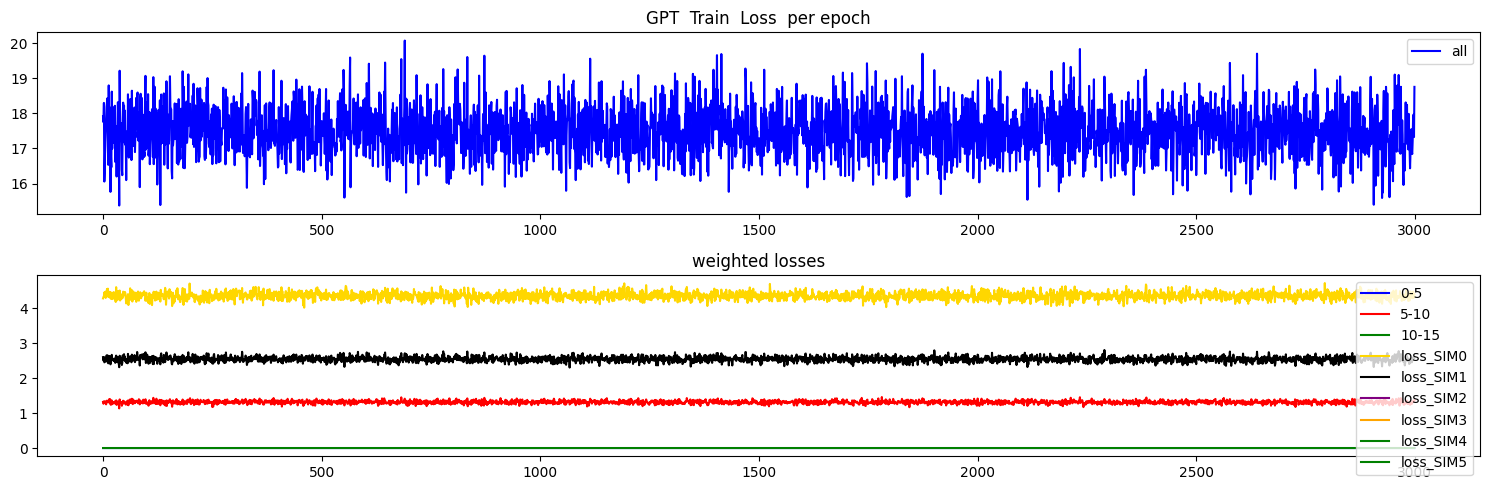

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.08016563951969147
Test MSE Loss - SI only 0-5:  0.03583721071481705
Test MSE Loss - SI only 5-10:  0.15775567293167114
Test MSE Loss - SI only 10-15:  0.07222427427768707
mae, mse, rmse, mape, mspe, rse, corr
(0.22649172, 0.08016564, 0.28313538, 4.5171623, 181.17722, 1.3656839)
Testing R**2 - SI only:  -0.8650924451619106
Testing R**2 - SI only:  -0.8650924451619106
Testing R**2 - All features:  0.9811565013213586
Testing R**2 - (f2) - SI full:  -1.6058623519244222


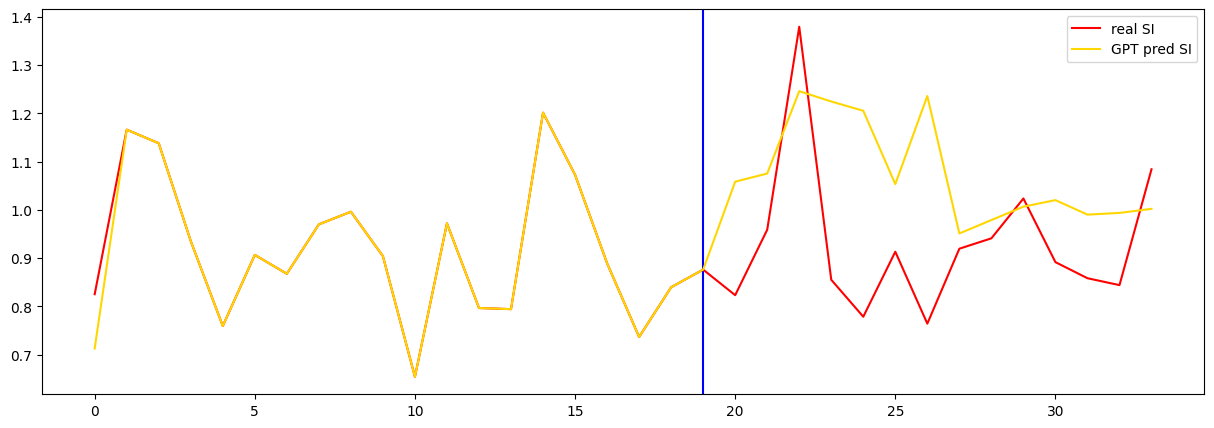

In [22]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  16.760269165039062
seq length of pred =  30
[ 3.59655043  2.34314455 17.23401471 28.81158458  0.89777783  0.52262687]
[tensor(1.7956, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3698, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  16.829551696777344
seq length of pred =  30
[ 3.57786837  2.29532049 16.87448028 28.68339256  0.87308248  0.52044269]
[tensor(1.7462, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4158, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  18.09451675415039
seq length of pred =  30
[ 3.67066355  2.36486252 17.42867145 29.24826085  0.87161745  0.52449223]
[tensor(1.7432, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4667, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  16.896203994750977
seq length of pred =  30
[ 3.58367846  2.26536018 17.16663687 28.83642652  0.86356733  0.52024486]
[tensor(1.7271, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4583, device='cud

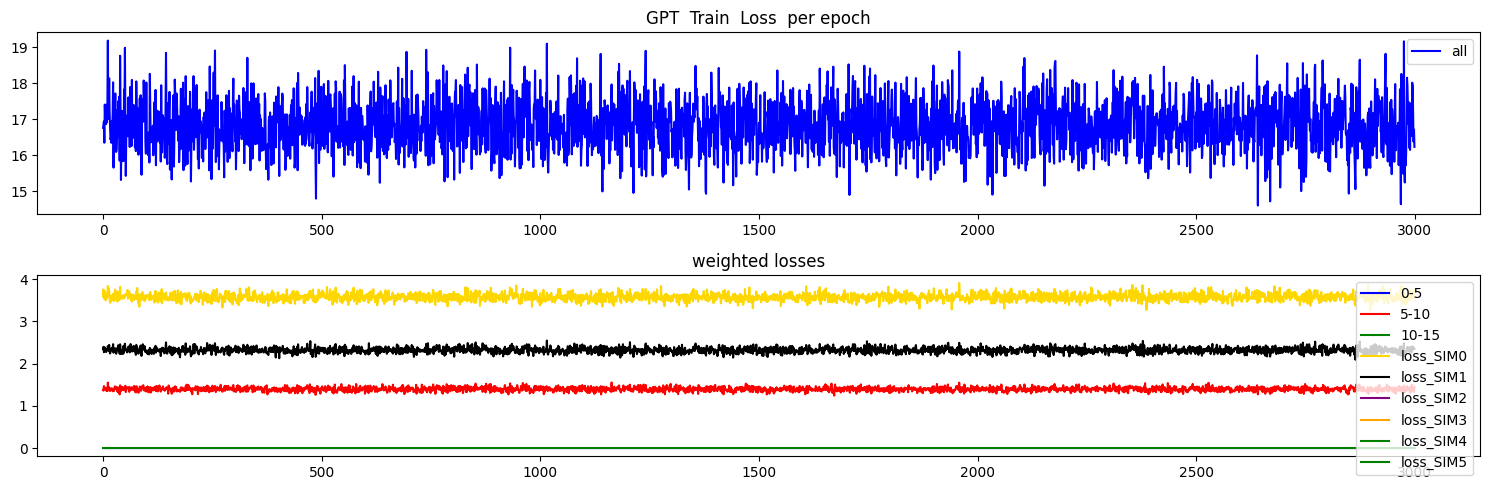

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.0691785141825676
Test MSE Loss - SI only 0-5:  0.03583721071481705
Test MSE Loss - SI only 5-10:  0.15775567293167114
Test MSE Loss - SI only 10-15:  0.07222427427768707
mae, mse, rmse, mape, mspe, rse, corr
(0.20079854, 0.06917851, 0.26301807, 4.01992, 176.91031, 1.2686496)
Testing R**2 - SI only:  -0.6094713102756133
Testing R**2 - SI only:  -0.6094713102756133
Testing R**2 - All features:  0.977860278621981
Testing R**2 - (f2) - SI full:  -1.444703781552854


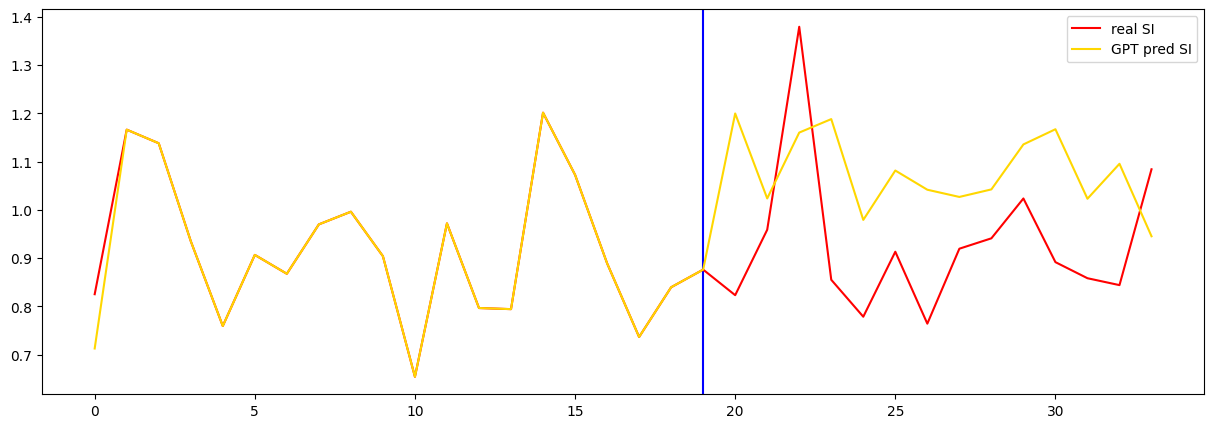

In [23]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  19.231264114379883
seq length of pred =  30
[ 3.4820662   2.4923265  17.4382337  31.06660143  1.05244366  0.57175379]
[tensor(2.1049, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3366, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  18.53567886352539
seq length of pred =  30
[ 3.43178947  2.42748273 16.235762   29.85368775  0.96733119  0.5474706 ]
[tensor(1.9347, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2610, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  17.57813262939453
seq length of pred =  30
[ 3.53573037  2.45811458 16.9195879  30.50596058  1.03049036  0.5647115 ]
[tensor(2.0610, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3520, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  18.48074722290039
seq length of pred =  30
[ 3.59543751  2.57472355 17.16752572 30.3904286   1.01796272  0.55970904]
[tensor(2.0359, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2867, device='cuda:

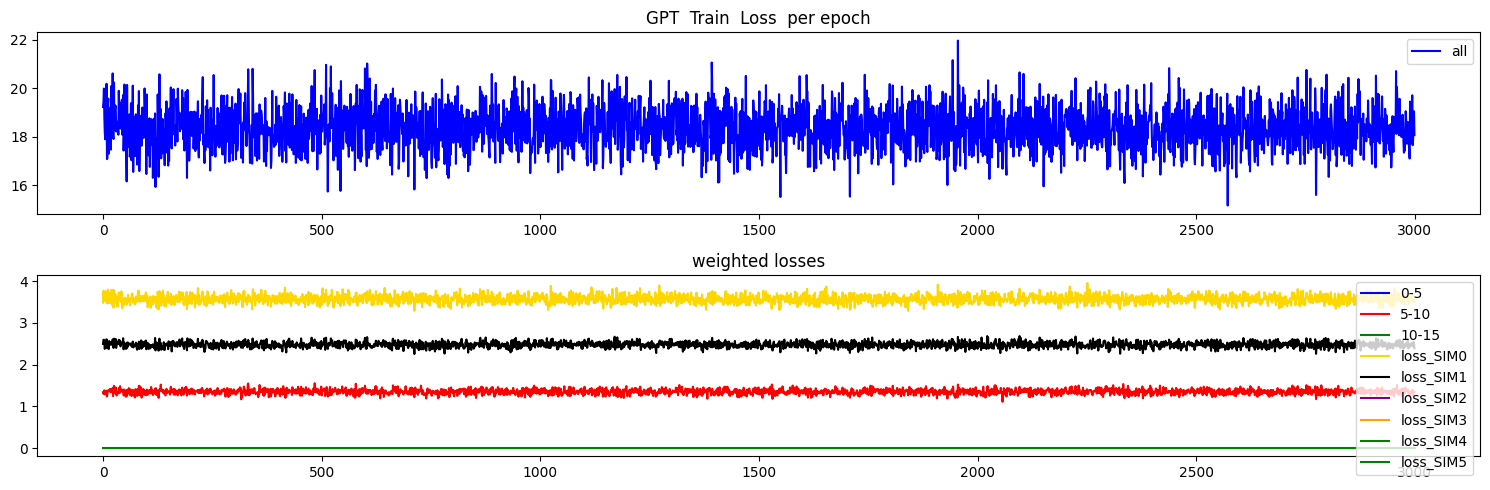

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.0694381594657898
Test MSE Loss - SI only 0-5:  0.03583721071481705
Test MSE Loss - SI only 5-10:  0.15775567293167114
Test MSE Loss - SI only 10-15:  0.07222425192594528
mae, mse, rmse, mape, mspe, rse, corr
(0.20801574, 0.06943816, 0.2635112, 4.375134, 179.16882, 1.2710282)
Testing R**2 - SI only:  -0.6155123434655383
Testing R**2 - SI only:  -0.6155123434655383
Testing R**2 - All features:  0.9754270216036772
Testing R**2 - (f2) - SI full:  -0.9671946962128661


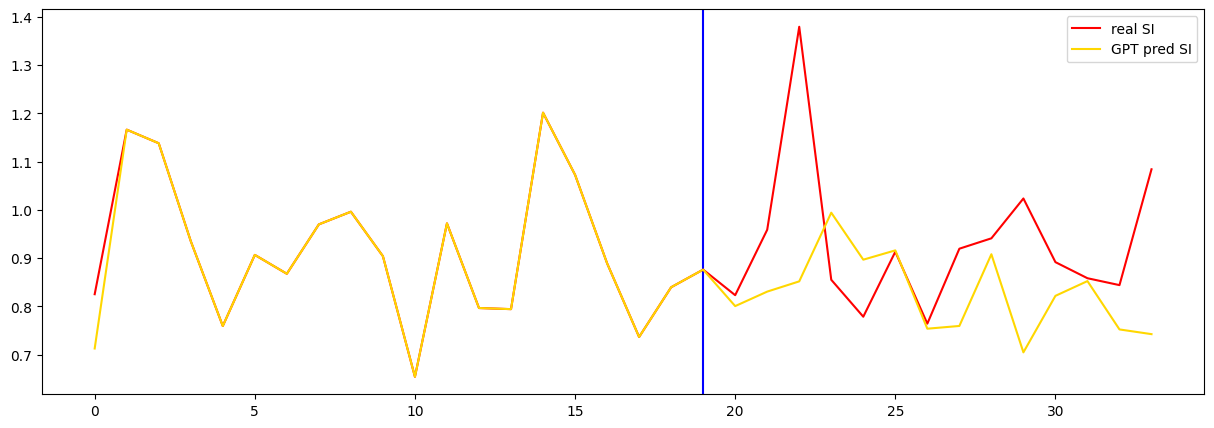

In [24]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  13.88508415222168
seq length of pred =  30
[ 4.04432316  2.18038612 15.53585451 25.45694054  0.67474467  0.45228954]
[tensor(1.3495, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1225, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  16.399656295776367
seq length of pred =  30
[ 4.11079907  2.32212389 16.50945789 27.37070453  0.75616621  0.48425552]
[tensor(1.5123, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2142, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  16.244674682617188
seq length of pred =  30
[ 4.23253506  2.3168179  16.54450344 27.24766226  0.75763669  0.48285324]
[tensor(1.5153, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2102, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  15.595136642456055
seq length of pred =  30
[ 4.03817168  2.29659172 16.85204203 27.56399418  0.74672807  0.48509115]
[tensor(1.4935, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2459, device='cud

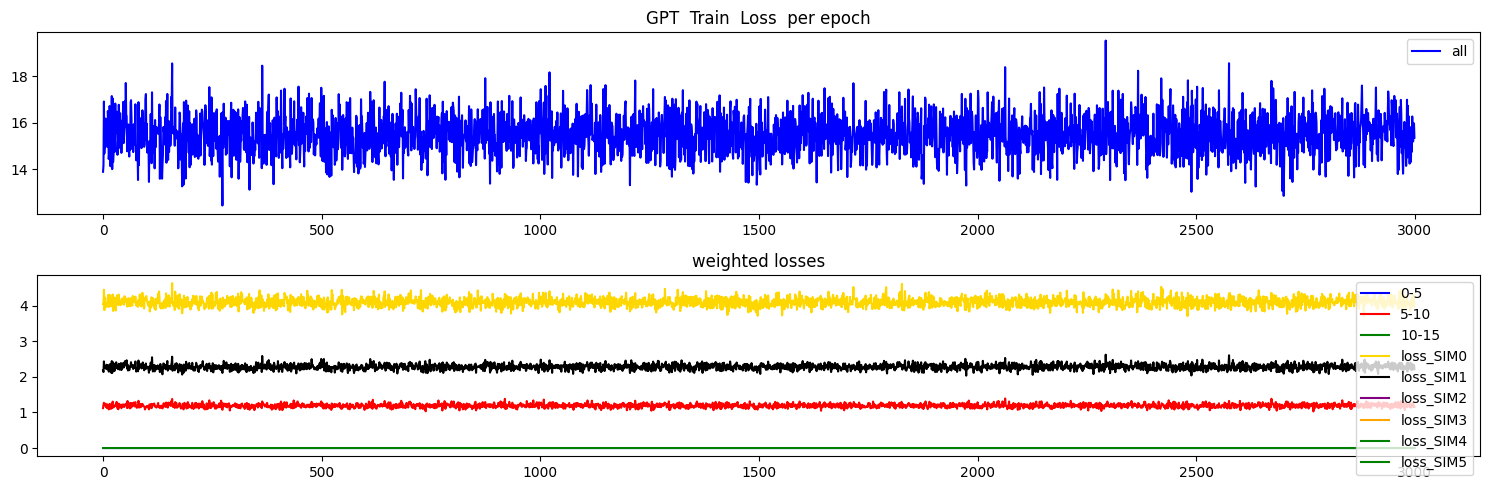

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.08469229936599731
Test MSE Loss - SI only 0-5:  0.03583721071481705
Test MSE Loss - SI only 5-10:  0.15775567293167114
Test MSE Loss - SI only 10-15:  0.07222427427768707
mae, mse, rmse, mape, mspe, rse, corr
(0.22066593, 0.0846923, 0.2910194, 4.07283, 176.85312, 1.4037122)
Testing R**2 - SI only:  -0.9704074401257938
Testing R**2 - SI only:  -0.9704074401257938
Testing R**2 - All features:  0.9778344330721442
Testing R**2 - (f2) - SI full:  -0.4383391656094102


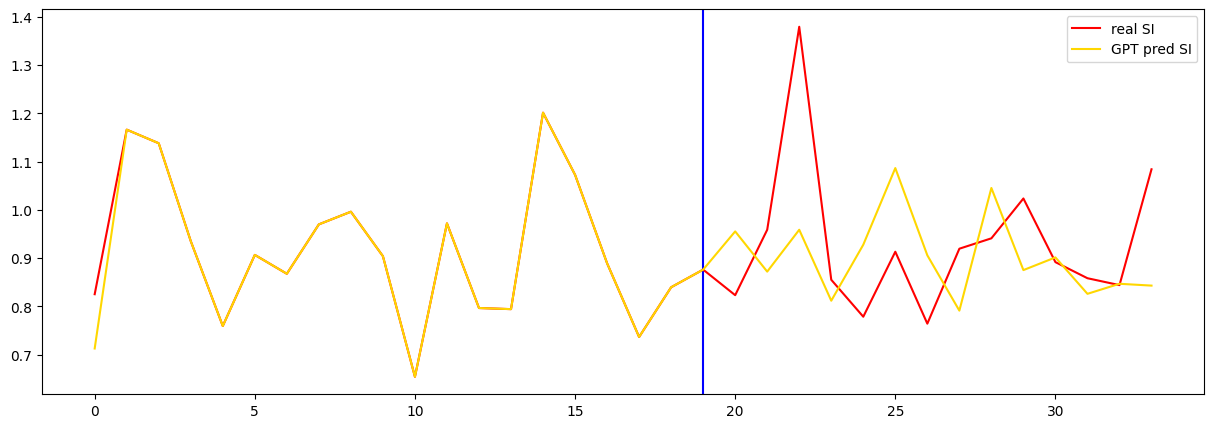

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 4


In [26]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  14.508262634277344
seq length of pred =  30
[ 6.58141781  2.38235766 12.54294164 23.10630433  0.54048113  0.40130685]
[tensor(1.0810, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2567, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  15.698989868164062
seq length of pred =  30
[ 6.6861714   2.46557888 12.55037459 23.55836661  0.57445376  0.41105892]
[tensor(1.1489, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2854, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  13.208187103271484
seq length of pred =  30
[ 5.95485672  2.20387496 12.30620608 22.44087479  0.50056401  0.38885908]
[tensor(1.0011, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2278, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  15.487237930297852
seq length of pred =  30
[ 6.65823616  2.42504365 12.59273628 23.44902997  0.56791512  0.40828117]
[tensor(1.1358, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2035, device='cu

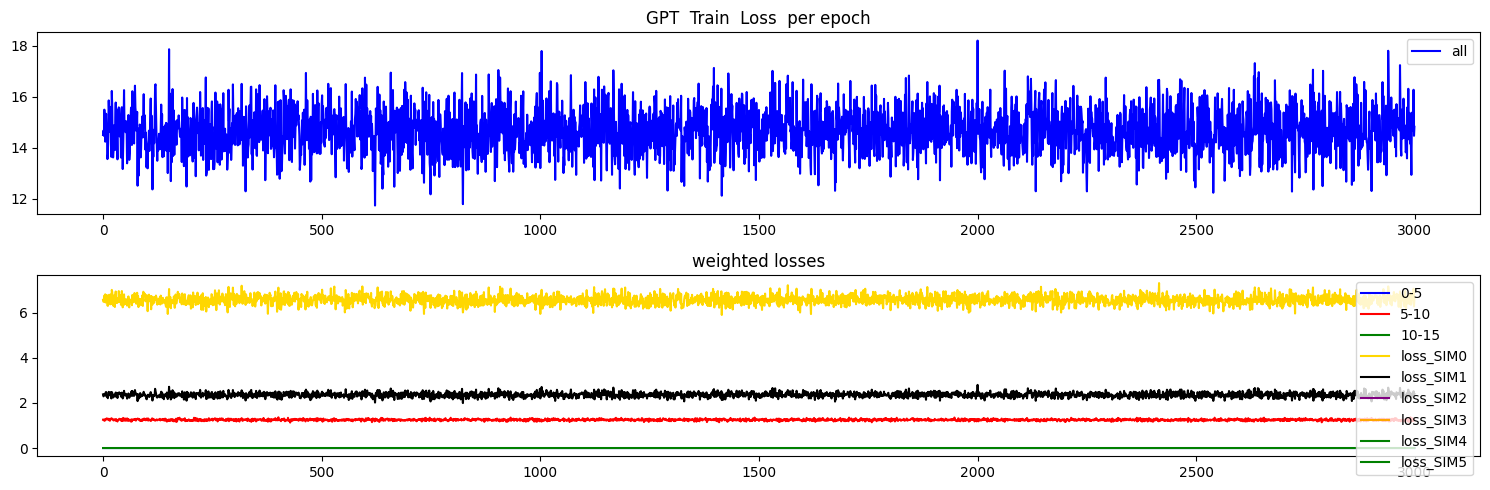

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.06579327583312988
Test MSE Loss - SI only 0-5:  0.14761076867580414
Test MSE Loss - SI only 5-10:  0.017600851133465767
Test MSE Loss - SI only 10-15:  0.06886366009712219
mae, mse, rmse, mape, mspe, rse, corr
(0.21476932, 0.065793276, 0.256502, 5.8729634, 252.85977, 1.6598749)
Testing R**2 - SI only:  -1.755185322702935
Testing R**2 - SI only:  -1.755185322702935
Testing R**2 - All features:  0.9861660985430578
Testing R**2 - (f2) - SI full:  -0.6819309282822887


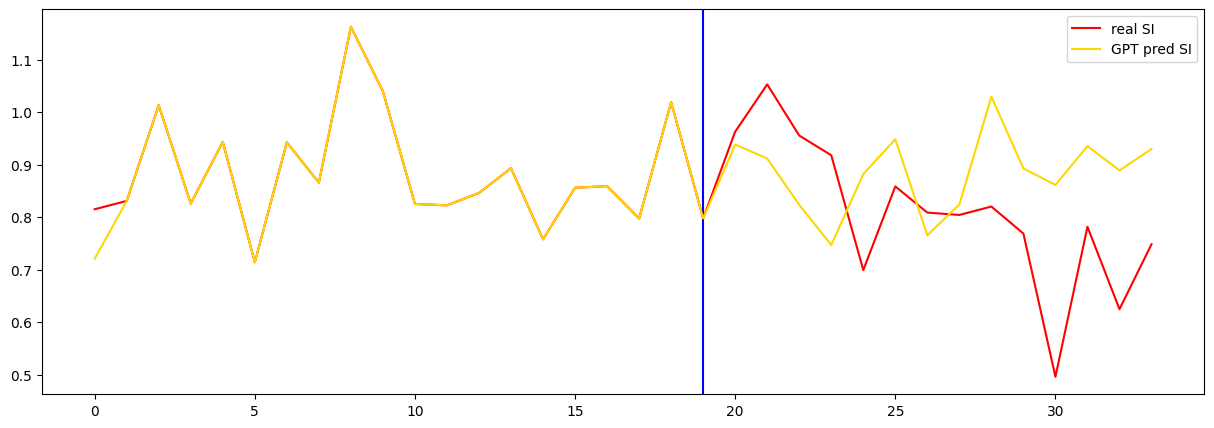

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  14.610271453857422
seq length of pred =  30
[ 4.18014013  2.40817449 13.52445335 24.48548065  0.64773464  0.43115432]
[tensor(1.2955, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2982, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  12.871198654174805
seq length of pred =  30
[ 4.18149351  2.09607116 12.61769316 24.07877937  0.60479205  0.42545215]
[tensor(1.2096, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1510, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  14.4993257522583
seq length of pred =  30
[ 4.17592046  2.27134848 13.14914925 24.69273581  0.65050539  0.43963658]
[tensor(1.3010, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2362, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  14.375041961669922
seq length of pred =  30
[ 4.13038586  2.30709896 13.25678511 24.19868657  0.62040812  0.42533886]
[tensor(1.2408, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1882, device='cuda

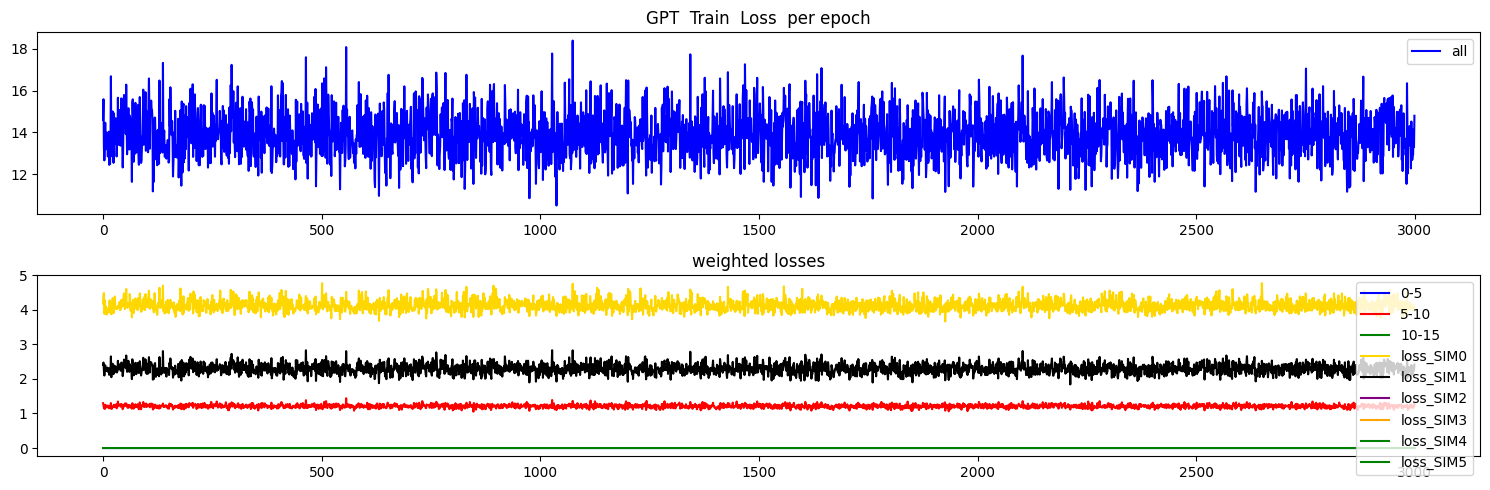

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.07979895174503326
Test MSE Loss - SI only 0-5:  0.14761076867580414
Test MSE Loss - SI only 5-10:  0.017600851133465767
Test MSE Loss - SI only 10-15:  0.06886366009712219
mae, mse, rmse, mape, mspe, rse, corr
(0.23709446, 0.07979895, 0.2824871, 5.7255397, 244.73001, 1.8280296)
Testing R**2 - SI only:  -2.3416925804902893
Testing R**2 - SI only:  -2.3416925804902893
Testing R**2 - All features:  0.9805763091888327
Testing R**2 - (f2) - SI full:  -3.211465103527246


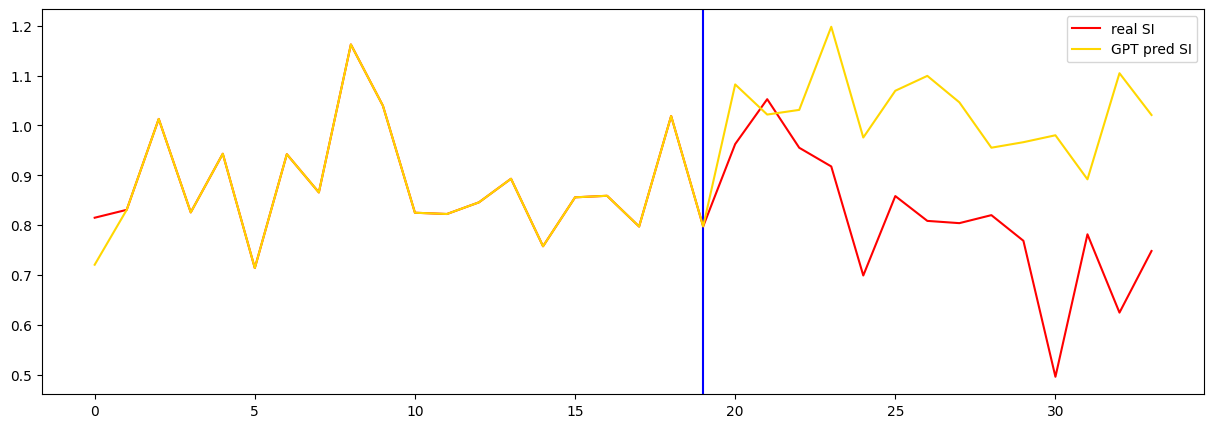

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  11.681699752807617
seq length of pred =  30
[ 5.11904997  2.17589096 11.13174591 19.67233231  0.44786288  0.34091433]
[tensor(0.8957, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1900, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  12.077759742736816
seq length of pred =  30
[ 5.30400731  2.12855787 11.01186512 19.92626568  0.43129808  0.344146  ]
[tensor(0.8626, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1062, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  8.853851318359375
seq length of pred =  30
[ 4.87350585  1.8688198  10.38220012 18.82963111  0.3717598   0.32528622]
[tensor(0.7435, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0922, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  15.682090759277344
seq length of pred =  30
[ 5.68001041  2.48643972 11.79484669 20.92476018  0.51047648  0.36172023]
[tensor(1.0210, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2629, device='cud

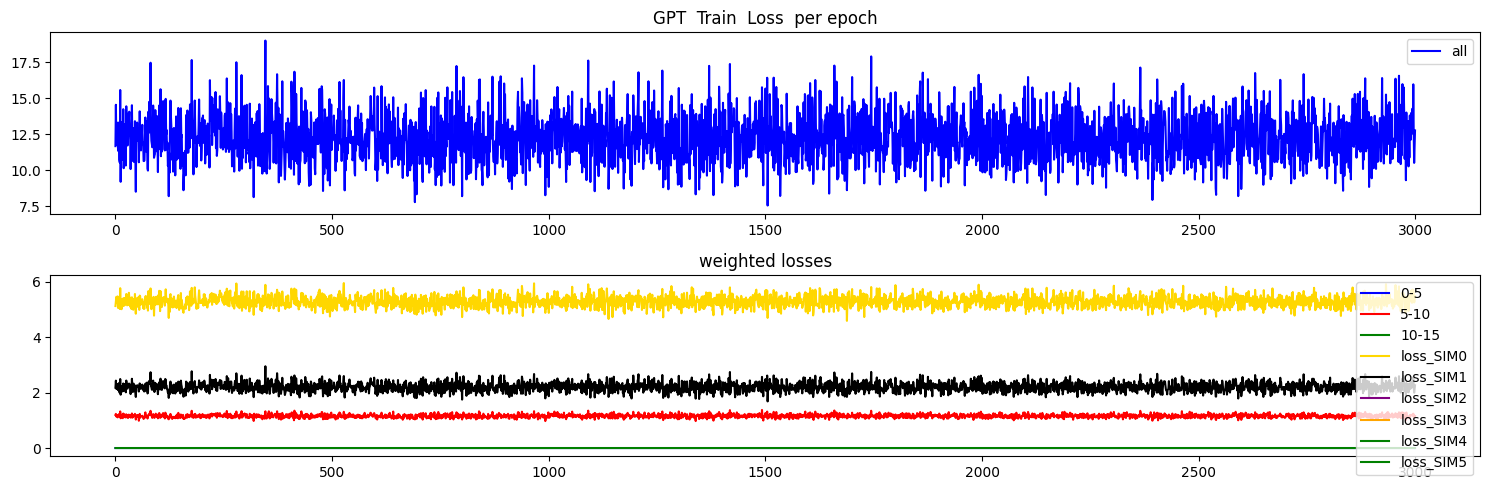

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.06679020822048187
Test MSE Loss - SI only 0-5:  0.14761076867580414
Test MSE Loss - SI only 5-10:  0.017600851133465767
Test MSE Loss - SI only 10-15:  0.06886366009712219
mae, mse, rmse, mape, mspe, rse, corr
(0.21474063, 0.0667902, 0.258438, 6.136202, 269.28146, 1.6724032)
Testing R**2 - SI only:  -1.7969334738639846
Testing R**2 - SI only:  -1.7969334738639846
Testing R**2 - All features:  0.9484172534484283
Testing R**2 - (f2) - SI full:  -1.7385464219238753


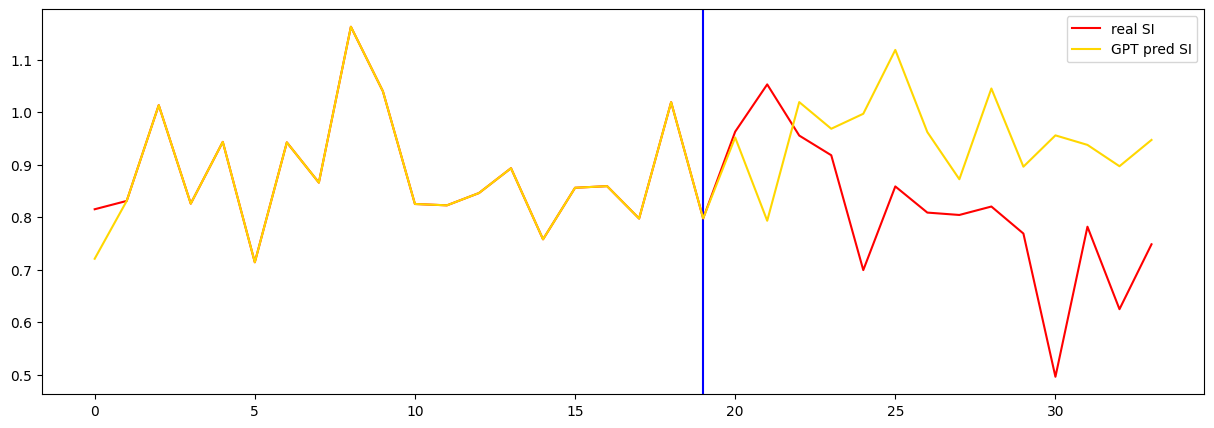

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  13.426979064941406
seq length of pred =  30
[ 3.55056466  2.15822391 14.02256921 25.42558309  0.7039603   0.4545756 ]
[tensor(1.4079, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1427, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  12.293582916259766
seq length of pred =  30
[ 3.60591832  2.00924048 12.92350262 24.37184212  0.61010441  0.4333099 ]
[tensor(1.2202, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0389, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  12.784708023071289
seq length of pred =  30
[ 3.53356011  2.16563252 13.57550897 24.85104791  0.67044448  0.44474976]
[tensor(1.3409, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0926, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  13.431793212890625
seq length of pred =  30
[ 3.80938986  2.21322848 13.11774742 24.37801124  0.66214096  0.43734775]
[tensor(1.3243, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0848, device='cu

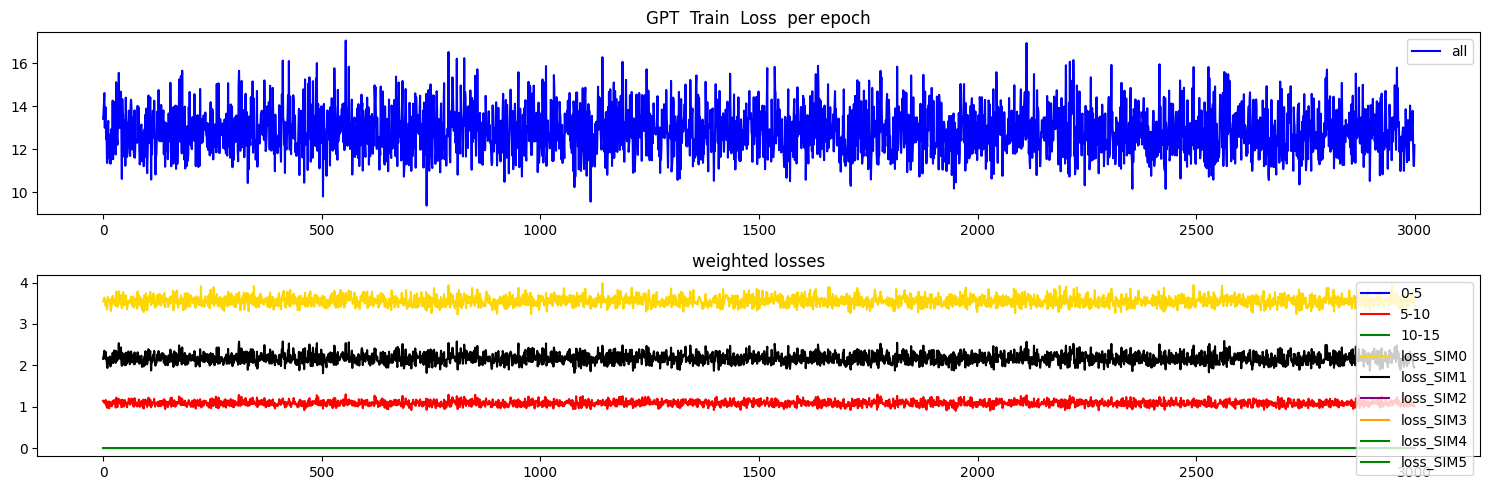

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.06372826546430588
Test MSE Loss - SI only 0-5:  0.14761076867580414
Test MSE Loss - SI only 5-10:  0.017600851133465767
Test MSE Loss - SI only 10-15:  0.06886366009712219
mae, mse, rmse, mape, mspe, rse, corr
(0.21051875, 0.06372827, 0.2524446, 5.1995687, 235.4975, 1.6336187)
Testing R**2 - SI only:  -1.6687100316805532
Testing R**2 - SI only:  -1.6687100316805532
Testing R**2 - All features:  0.97857303929458
Testing R**2 - (f2) - SI full:  -0.7779225055111549


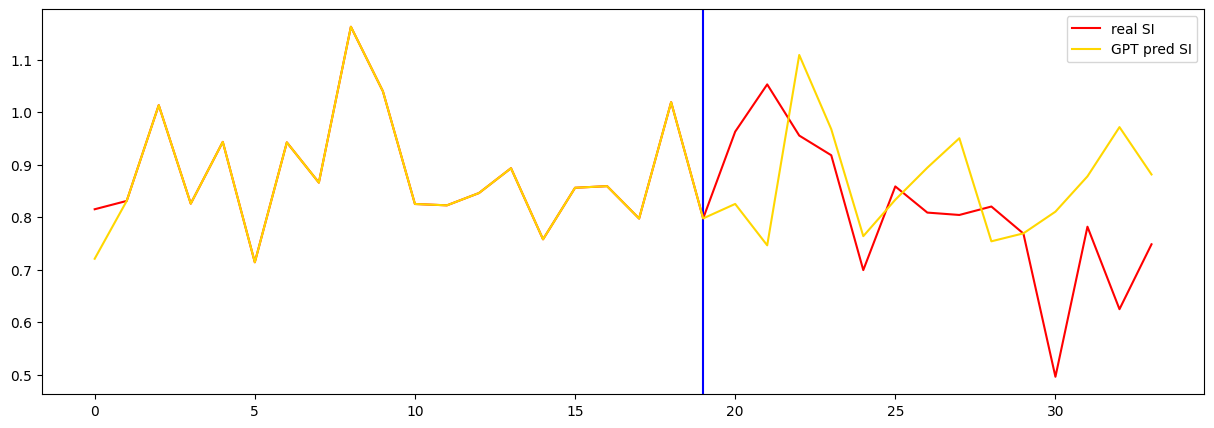

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 5


In [31]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  8.28290843963623
seq length of pred =  30
[ 3.89581505  1.7993302  12.3063181  21.96211619  0.4699087   0.38163968]
[tensor(0.9398, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1875, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  8.778115272521973
seq length of pred =  30
[ 3.7600172   1.83593571 12.03407566 21.29597559  0.46035101  0.37050009]
[tensor(0.9207, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1732, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  8.75245475769043
seq length of pred =  30
[ 4.05909     1.84511884 12.00101032 21.33641545  0.45739361  0.37260973]
[tensor(0.9148, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1655, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  8.614150047302246
seq length of pred =  30
[ 3.96094512  1.85299125 12.19242511 21.70924165  0.46369106  0.37780089]
[tensor(0.9274, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1344, device='cuda:0',

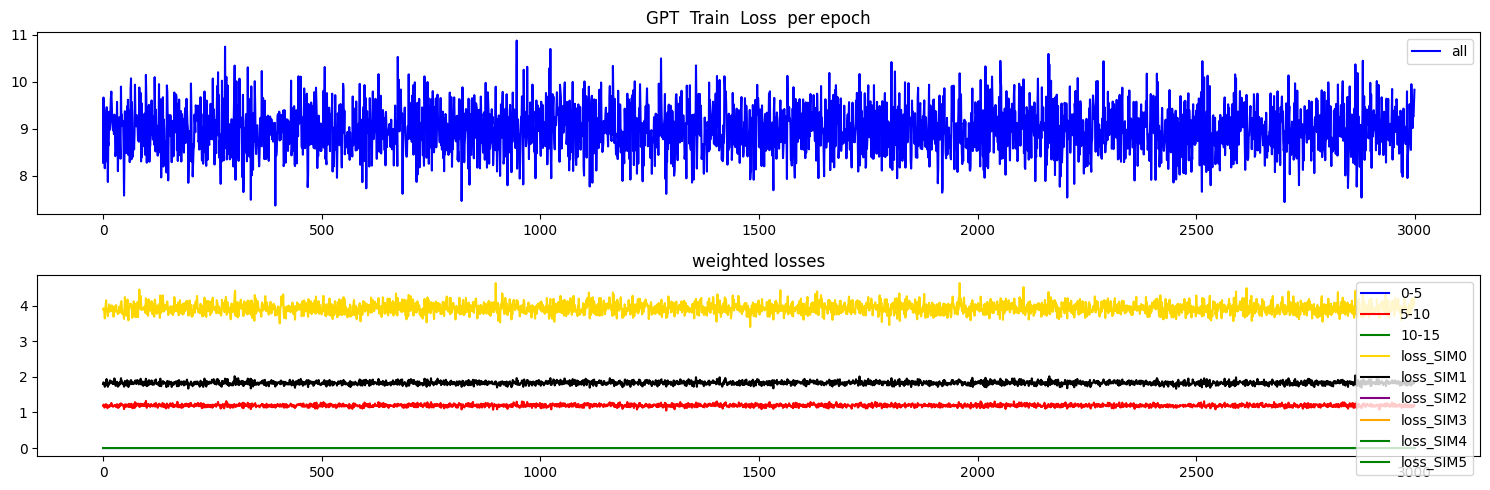

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.27498990297317505
Test MSE Loss - SI only 0-5:  0.04927448928356171
Test MSE Loss - SI only 5-10:  0.030321255326271057
Test MSE Loss - SI only 10-15:  0.018505986779928207
mae, mse, rmse, mape, mspe, rse, corr
(0.2843558, 0.27498993, 0.5243948, 2.4324641, 14.361402, 1.957594)
Testing R**2 - SI only:  -2.832173888516642
Testing R**2 - SI only:  -2.832173888516642
Testing R**2 - All features:  0.9817417483392732
Testing R**2 - (f2) - SI full:  -17.71106485509189


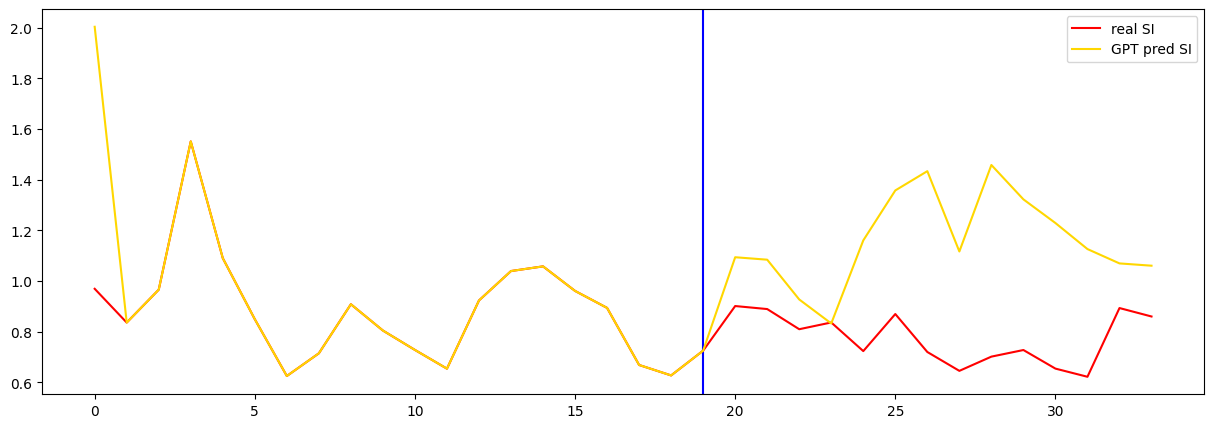

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  10.973370552062988
seq length of pred =  30
[ 3.44162202  1.86842694 11.68401385 22.35996513  0.50782441  0.39070206]
[tensor(1.0156, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0595, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  10.033612251281738
seq length of pred =  30
[ 3.55598847  1.73119217 11.63247777 21.90710305  0.46714378  0.38251395]
[tensor(0.9343, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0463, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  10.129325866699219
seq length of pred =  30
[ 3.53104212  1.73291069 11.79091015 22.25756097  0.48144298  0.38849033]
[tensor(0.9629, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0590, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  10.739331245422363
seq length of pred =  30
[ 3.40728431  1.85483136 11.88581194 22.32041685  0.5013541   0.39011238]
[tensor(1.0027, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0778, device='cu

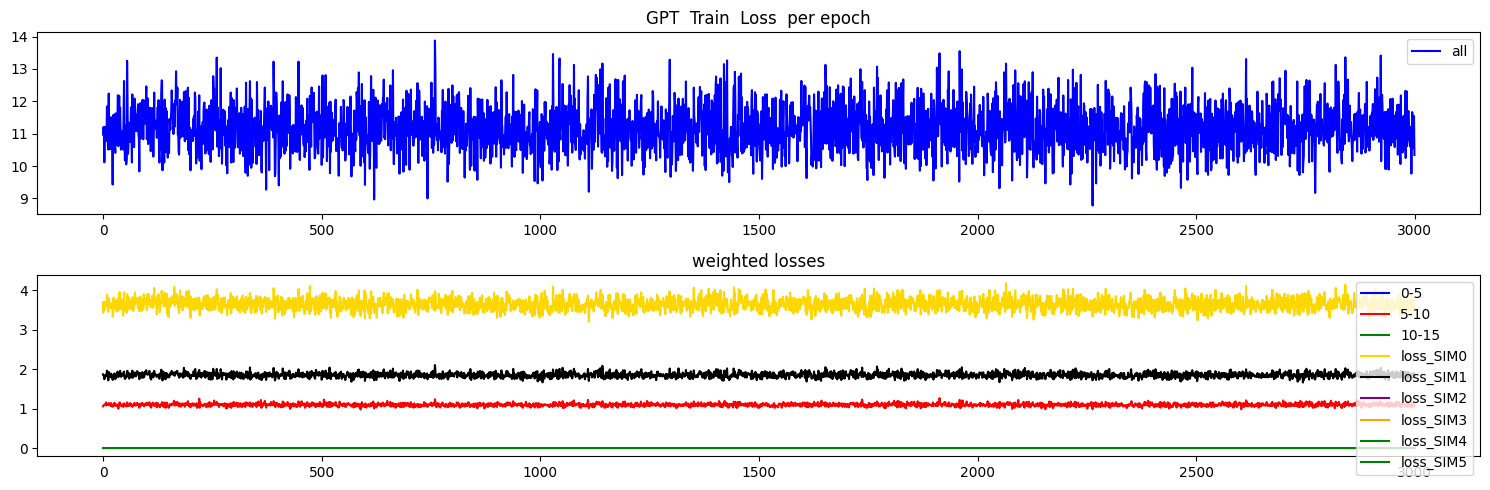

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.26056399941444397
Test MSE Loss - SI only 0-5:  0.04927448928356171
Test MSE Loss - SI only 5-10:  0.030321255326271057
Test MSE Loss - SI only 10-15:  0.018505988642573357
mae, mse, rmse, mape, mspe, rse, corr
(0.2496617, 0.26056397, 0.51045465, 1.8277497, 8.056845, 1.9055547)
Testing R**2 - SI only:  -2.631138339249128
Testing R**2 - SI only:  -2.631138339249128
Testing R**2 - All features:  0.9783276887193022
Testing R**2 - (f2) - SI full:  -7.418821357249387


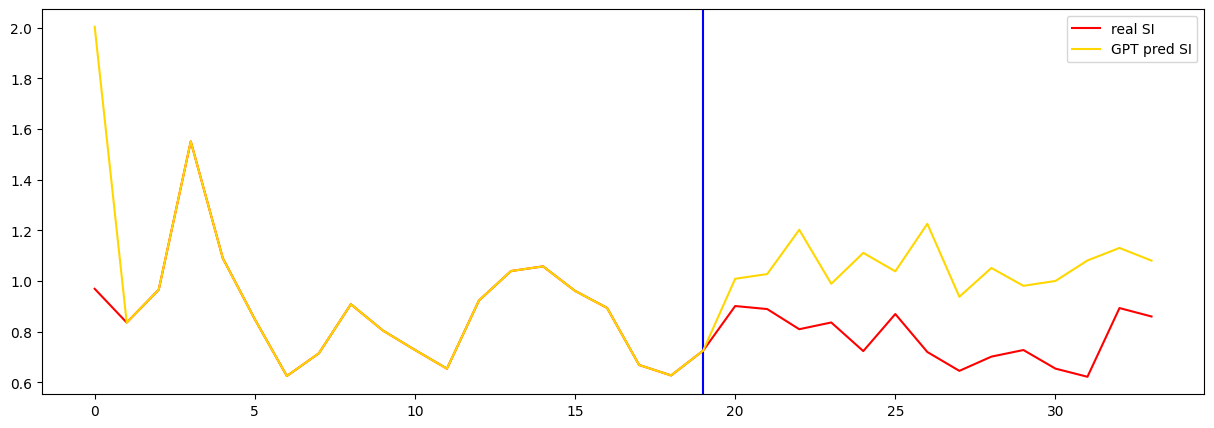

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  10.008928298950195
seq length of pred =  30
[ 3.70876764  1.96050086 10.86329923 20.44954227  0.42450649  0.35492732]
[tensor(0.8490, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9286, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  10.3851957321167
seq length of pred =  30
[ 3.67235563  1.95631341 11.25173756 20.95448995  0.43720149  0.36316924]
[tensor(0.8744, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9595, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  9.913544654846191
seq length of pred =  30
[ 3.74670959  1.87641725 11.19876484 21.18554272  0.44308999  0.36880365]
[tensor(0.8862, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9881, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  10.391207695007324
seq length of pred =  30
[ 3.59892599  2.00395404 11.14290362 20.44261006  0.43158836  0.3545972 ]
[tensor(0.8632, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9935, device='cuda:

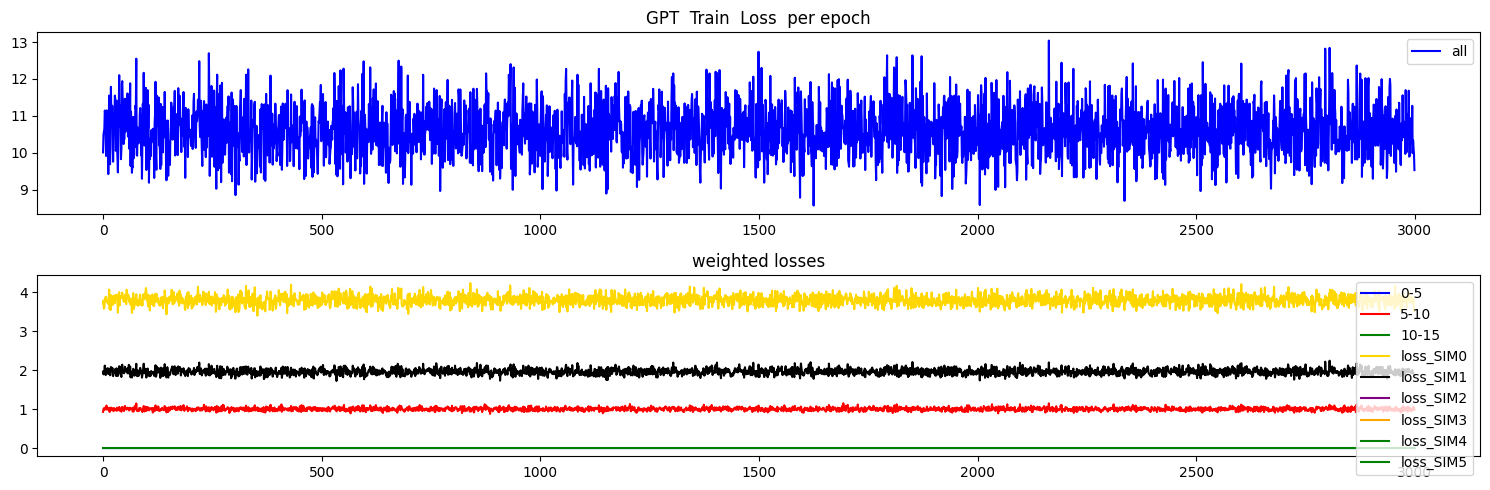

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.2658401429653168
Test MSE Loss - SI only 0-5:  0.04927448183298111
Test MSE Loss - SI only 5-10:  0.03032125160098076
Test MSE Loss - SI only 10-15:  0.018505986779928207
mae, mse, rmse, mape, mspe, rse, corr
(0.2645718, 0.26584014, 0.51559687, 1.9662536, 8.654486, 1.9247508)
Testing R**2 - SI only:  -2.7046652158931597
Testing R**2 - SI only:  -2.7046652158931597
Testing R**2 - All features:  0.9739858856364094
Testing R**2 - (f2) - SI full:  -8.174252728025076


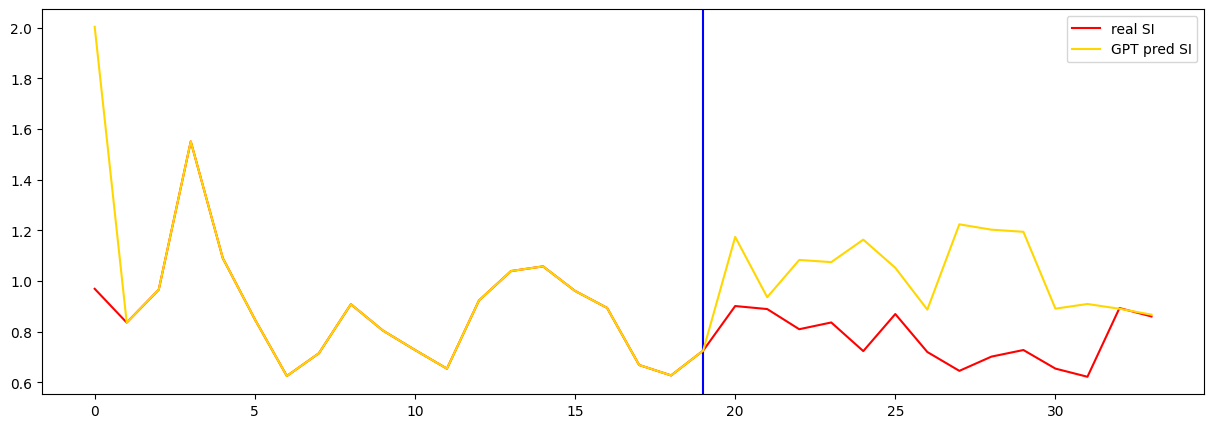

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  10.750354766845703
seq length of pred =  30
[ 4.29369489  2.01134843 12.28453178 21.36334091  0.46652683  0.37206767]
[tensor(0.9331, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9797, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  12.223139762878418
seq length of pred =  30
[ 4.15231186  2.14665218 12.54741583 22.12886702  0.51162716  0.38444394]
[tensor(1.0233, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0048, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  11.300378799438477
seq length of pred =  30
[ 4.12470117  1.9769056  12.45788566 22.59868896  0.5150659   0.39547946]
[tensor(1.0301, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9512, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  9.933788299560547
seq length of pred =  30
[ 4.2179613   1.86507496 11.94767664 20.8680573   0.44256498  0.36379271]
[tensor(0.8851, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9328, device='cud

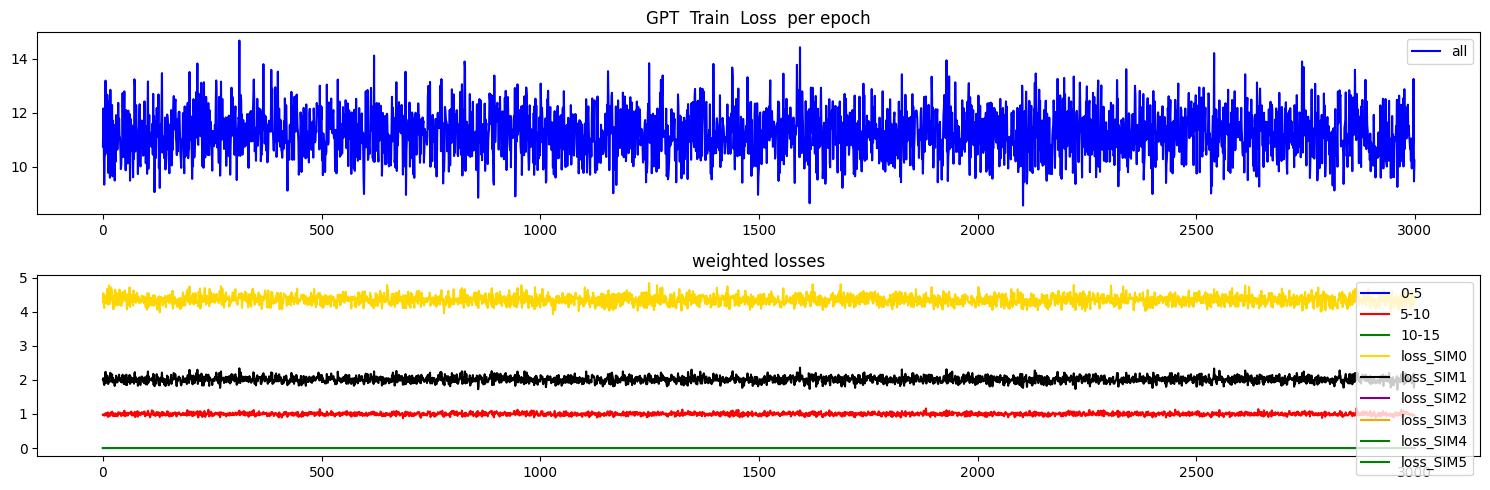

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.27131587266921997
Test MSE Loss - SI only 0-5:  0.04927448555827141
Test MSE Loss - SI only 5-10:  0.03032125160098076
Test MSE Loss - SI only 10-15:  0.018505988642573357
mae, mse, rmse, mape, mspe, rse, corr
(0.2869799, 0.27131587, 0.5208799, 2.8823762, 27.70929, 1.9444726)
Testing R**2 - SI only:  -2.7809736264815417
Testing R**2 - SI only:  -2.7809736264815417
Testing R**2 - All features:  0.9785827288617219
Testing R**2 - (f2) - SI full:  -5.184041348342231


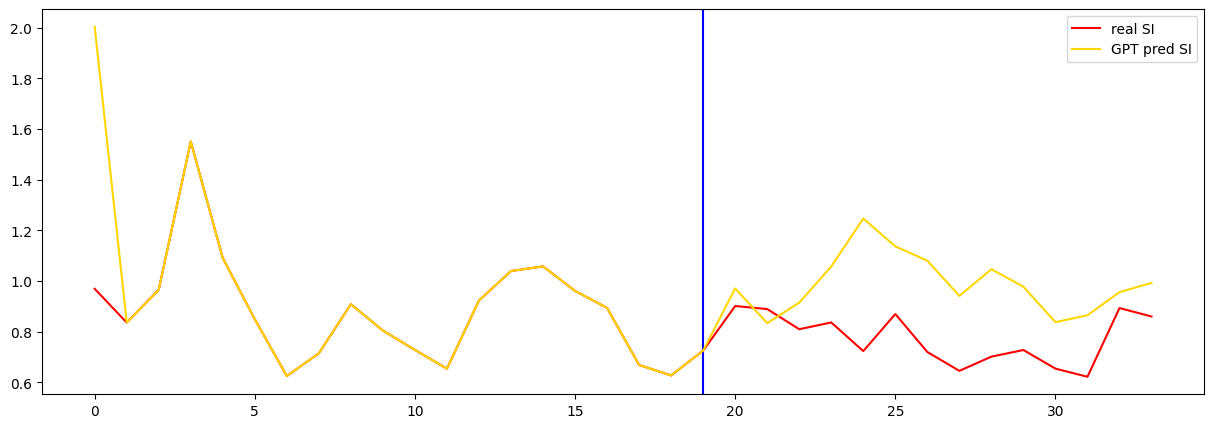

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Train on Train, Test on Train



## 000 to 015


0 train loss =  12.881000518798828
seq length of pred =  30
[ 4.40830459  2.49909244 11.55343112 21.34274973  0.52664797  0.37353175]
[tensor(1.0533, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2499, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  8.83306884765625
seq length of pred =  30
[ 3.97950547  1.92300316 10.73660588 19.68538367  0.39672564  0.3423635 ]
[tensor(0.7935, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1391, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  10.097076416015625
seq length of pred =  30
[ 4.15844237  2.13765203 10.63352217 19.90773376  0.44119634  0.34801133]
[tensor(0.8824, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1715, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  9.191715240478516
seq length of pred =  30
[ 3.85635384  1.94261941 10.87155291 20.0792758   0.41783287  0.3487921 ]
[tensor(0.8357, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1356, device='cuda:

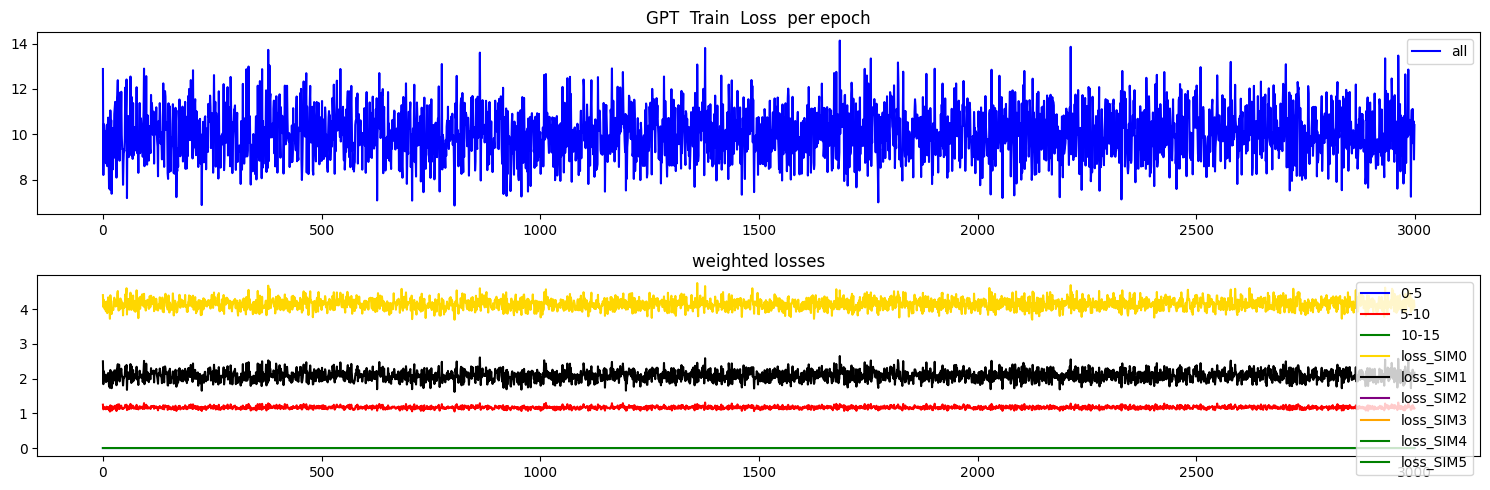

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.15046139061450958
Test MSE Loss - SI only 0-5:  0.020758822560310364
Test MSE Loss - SI only 5-10:  0.021980848163366318
Test MSE Loss - SI only 10-15:  1.1247403621673584
mae, mse, rmse, mape, mspe, rse, corr
(0.22555108, 0.1504614, 0.38789356, 2.2436874, 12.598592, 1.5150081)
Testing R**2 - SI only:  -1.295249411633848
Testing R**2 - SI only:  -1.295249411633848
Testing R**2 - All features:  0.749645053668802
Testing R**2 - (f2) - SI full:  -0.27831529007169586


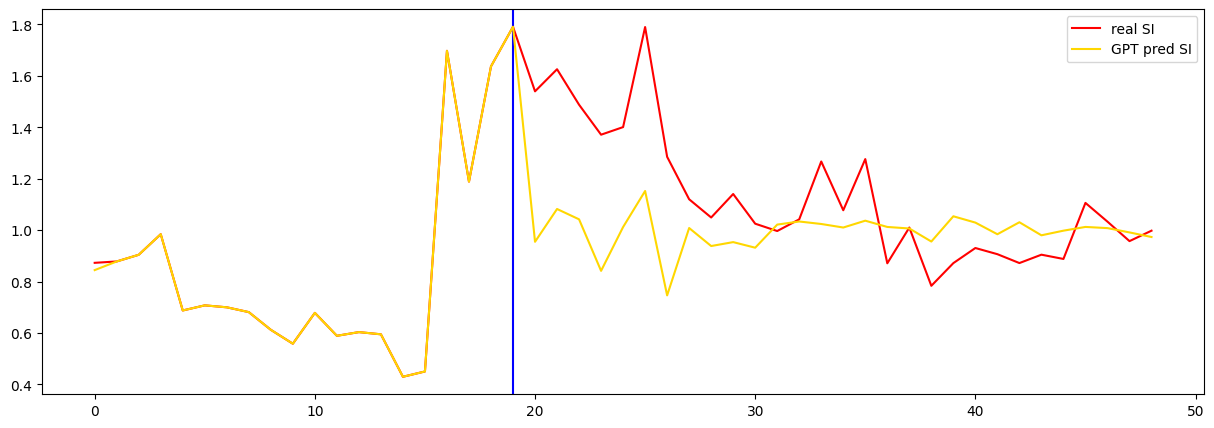

In [36]:

inferenceGPT_obj.the_offset = 0
train_CIVS, test_CIVS                                    = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  train_CIVS  ) 
results_string  = inferenceGPT_obj.function_test_rc( train_CIVS, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 015 to 030


0 train loss =  10.560750961303711
seq length of pred =  30
[ 3.6998072   1.7480703  13.16715409 25.05766316  0.61350038  0.44933669]
[tensor(1.2270, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3288, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  10.527107238769531
seq length of pred =  30
[ 3.62344828  1.70737889 13.09201306 25.35610222  0.61516556  0.45239701]
[tensor(1.2303, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2801, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  10.411371231079102
seq length of pred =  30
[ 3.55044423  1.70884696 13.05294104 25.31179391  0.60881863  0.45144867]
[tensor(1.2176, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2634, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  11.017274856567383
seq length of pred =  30
[ 3.66735727  1.76813954 13.70800675 25.73822009  0.63431106  0.45955352]
[tensor(1.2686, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3626, device='cu

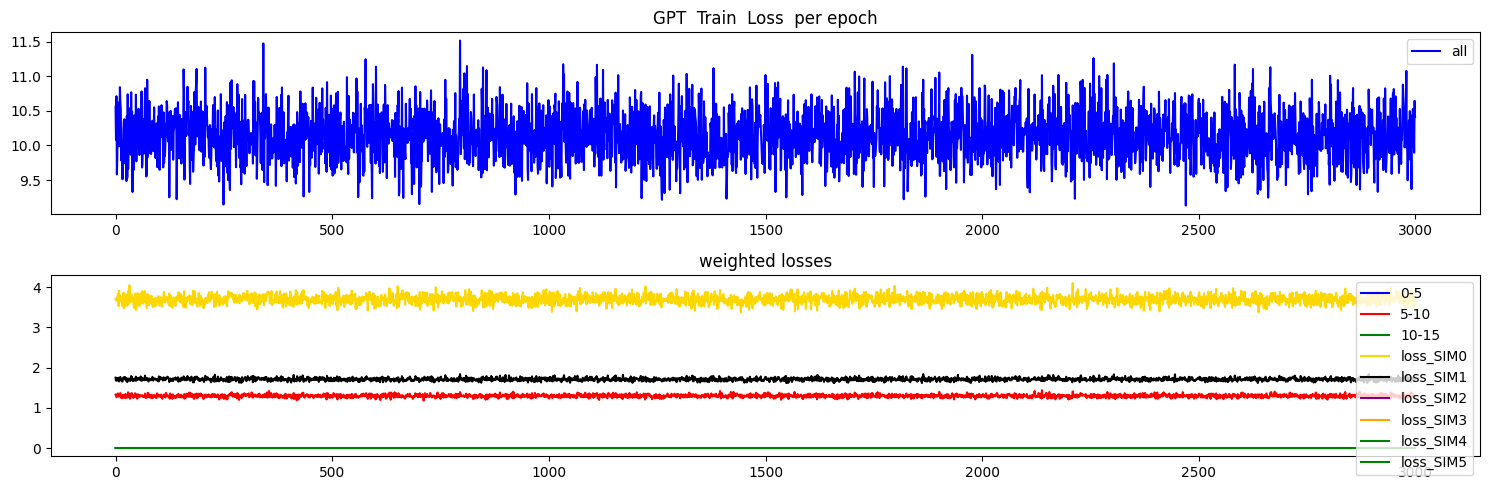

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.04591287299990654
Test MSE Loss - SI only 0-5:  0.04364911839365959
Test MSE Loss - SI only 5-10:  0.10514815896749496
Test MSE Loss - SI only 10-15:  0.09140584617853165
mae, mse, rmse, mape, mspe, rse, corr
(0.17445496, 0.045912866, 0.21427287, 4.198154, 200.39345, 1.3333411)
Testing R**2 - SI only:  -0.7777990313700305
Testing R**2 - SI only:  -0.7777990313700305
Testing R**2 - All features:  0.9864723491911553
Testing R**2 - (f2) - SI full:  -0.0009693612438321786


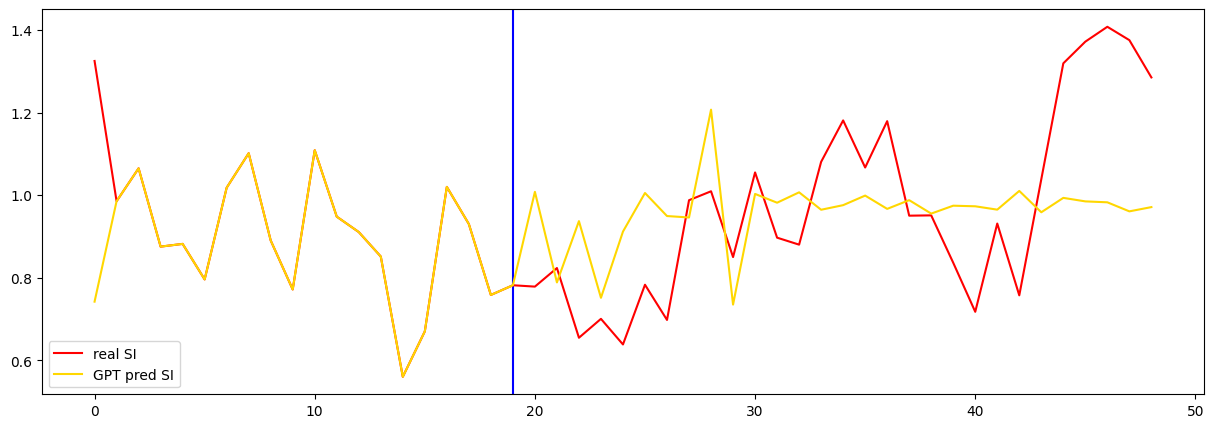

In [37]:

inferenceGPT_obj.the_offset = 15
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 030 to 045


0 train loss =  16.047199249267578
seq length of pred =  30
[ 4.31118953  2.24535065 13.97783313 25.39505141  0.67995678  0.45045216]
[tensor(1.3599, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1258, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  16.4918212890625
seq length of pred =  30
[ 4.43018268  2.30257229 14.04721257 25.5241269   0.71575509  0.45486206]
[tensor(1.4315, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1181, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  18.517044067382812
seq length of pred =  30
[ 4.59878607  2.49647875 14.69935846 26.33843595  0.74192114  0.46733745]
[tensor(1.4838, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1516, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  14.210094451904297
seq length of pred =  30
[ 4.03510321  2.1556617  13.67157457 25.43115214  0.68202727  0.45399293]
[tensor(1.3641, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0731, device='cuda

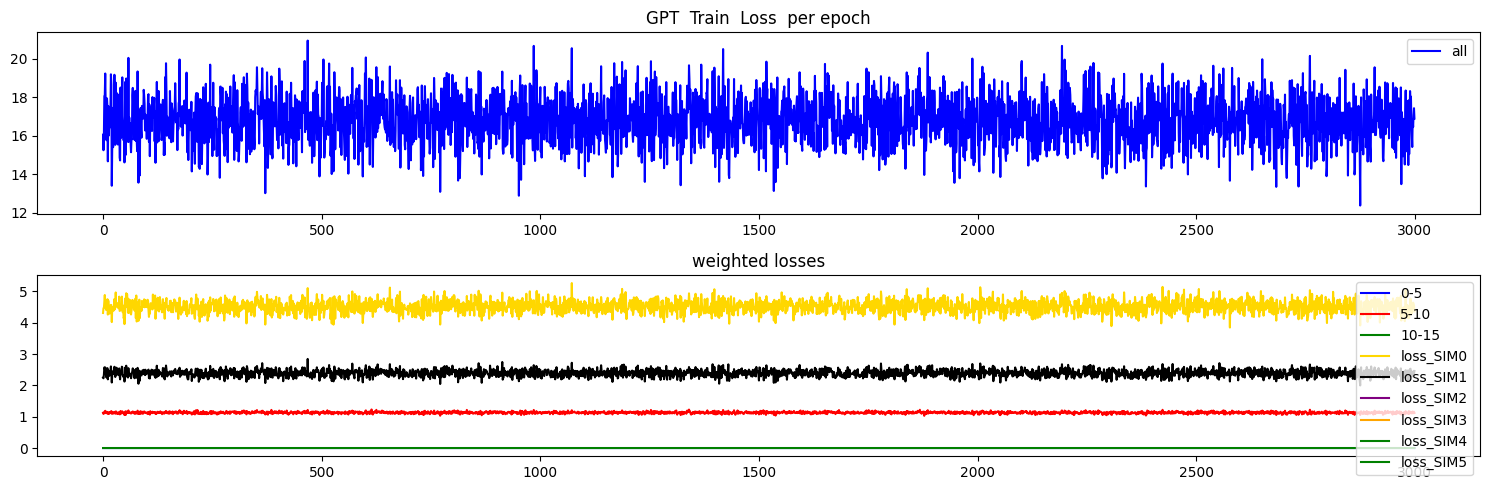

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.045314040035009384
Test MSE Loss - SI only 0-5:  0.047237057238817215
Test MSE Loss - SI only 5-10:  0.0761810690164566
Test MSE Loss - SI only 10-15:  0.10439801216125488
mae, mse, rmse, mape, mspe, rse, corr
(0.16518542, 0.04531404, 0.21287094, 1.8453622, 10.258663, 1.1735542)
Testing R**2 - SI only:  -0.37722947670580087
Testing R**2 - SI only:  -0.37722947670580087
Testing R**2 - All features:  0.8897817388002122
Testing R**2 - (f2) - SI full:  -0.680122449547764


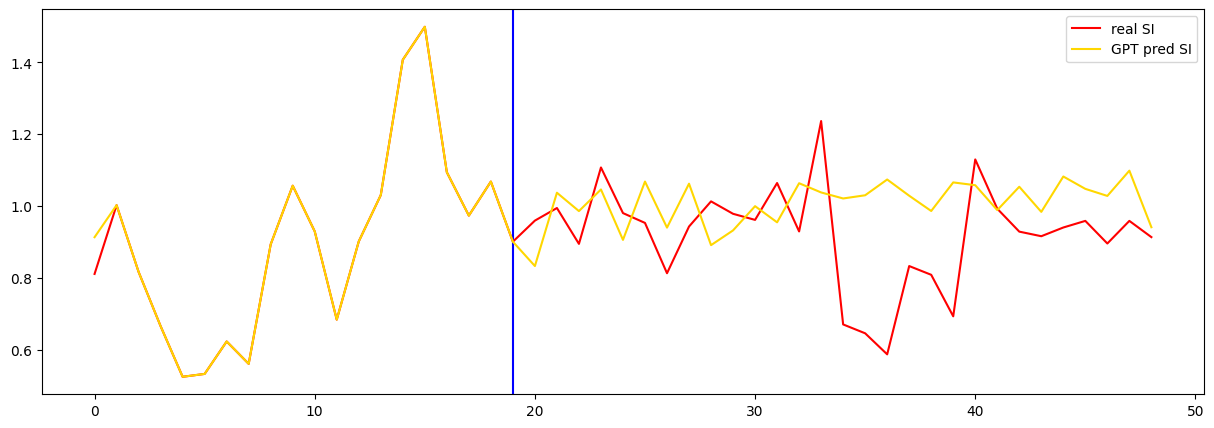

In [38]:

inferenceGPT_obj.the_offset = 30
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 045 to 060


0 train loss =  26.03403091430664
seq length of pred =  30
[ 5.30723986  2.59422945 18.24125087 32.66146886  1.11588415  0.60084826]
[tensor(2.2318, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.5978, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  24.85479736328125
seq length of pred =  30
[ 5.1239629   2.6166151  17.9239057  32.13147493  1.05015622  0.58450291]
[tensor(2.1003, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.5562, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  23.60366439819336
seq length of pred =  30
[ 5.21594268  2.54951837 18.10246672 32.18649142  1.07698762  0.58872568]
[tensor(2.1540, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.5420, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  24.24996566772461
seq length of pred =  30
[ 5.18845329  2.5360801  17.88122076 32.33546634  1.06229246  0.58728492]
[tensor(2.1246, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.5637, device='cuda:0

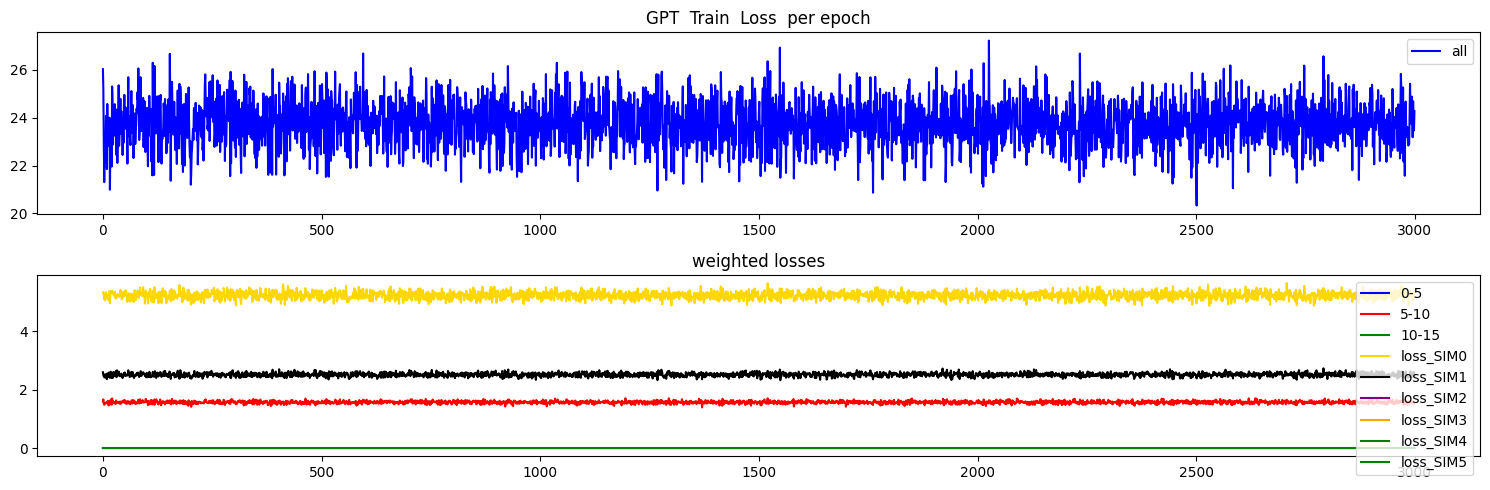

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.09411846846342087
Test MSE Loss - SI only 0-5:  0.1299821138381958
Test MSE Loss - SI only 5-10:  0.11266769468784332
Test MSE Loss - SI only 10-15:  0.14181946218013763
mae, mse, rmse, mape, mspe, rse, corr
(0.2590754, 0.09411847, 0.30678734, 36.253212, 54785.613, 1.2577268)
Testing R**2 - SI only:  -0.581876515603257
Testing R**2 - SI only:  -0.581876515603257
Testing R**2 - All features:  0.9720560150427655
Testing R**2 - (f2) - SI full:  -0.07808854612047988


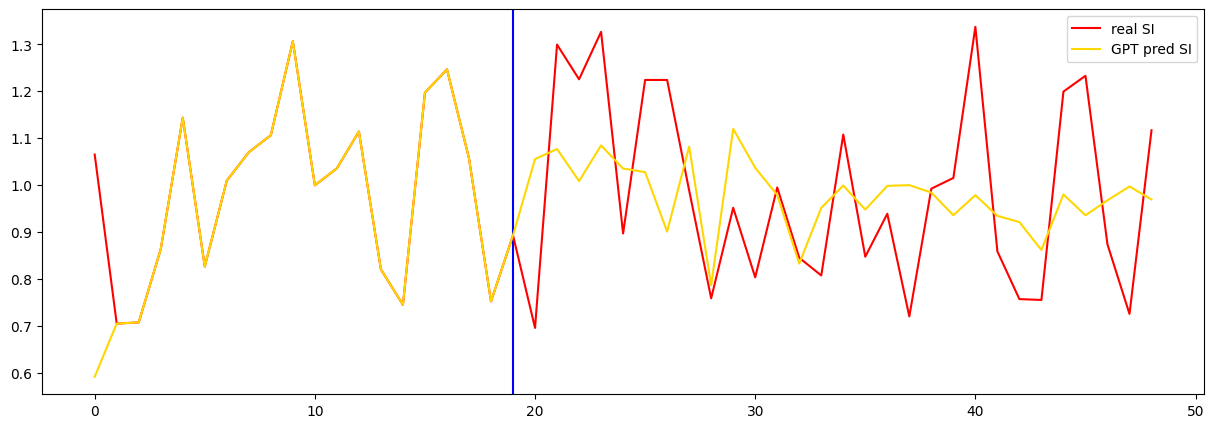

In [39]:

inferenceGPT_obj.the_offset = 45
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 060 to 075


0 train loss =  20.129091262817383
seq length of pred =  30
[ 3.3268713   2.49998969 17.27366187 28.46710586  0.86048232  0.50530606]
[tensor(1.7210, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1830, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  18.741043090820312
seq length of pred =  30
[ 3.07636466  2.45108995 16.5055028  28.01956359  0.83369881  0.49649601]
[tensor(1.6674, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1768, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  19.91196060180664
seq length of pred =  30
[ 3.23359894  2.50588405 17.17817067 29.0559383   0.87670363  0.51662551]
[tensor(1.7534, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1943, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  19.125587463378906
seq length of pred =  30
[ 3.16972848  2.52881582 17.29921011 28.49386449  0.87855604  0.50982368]
[tensor(1.7571, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1982, device='cud

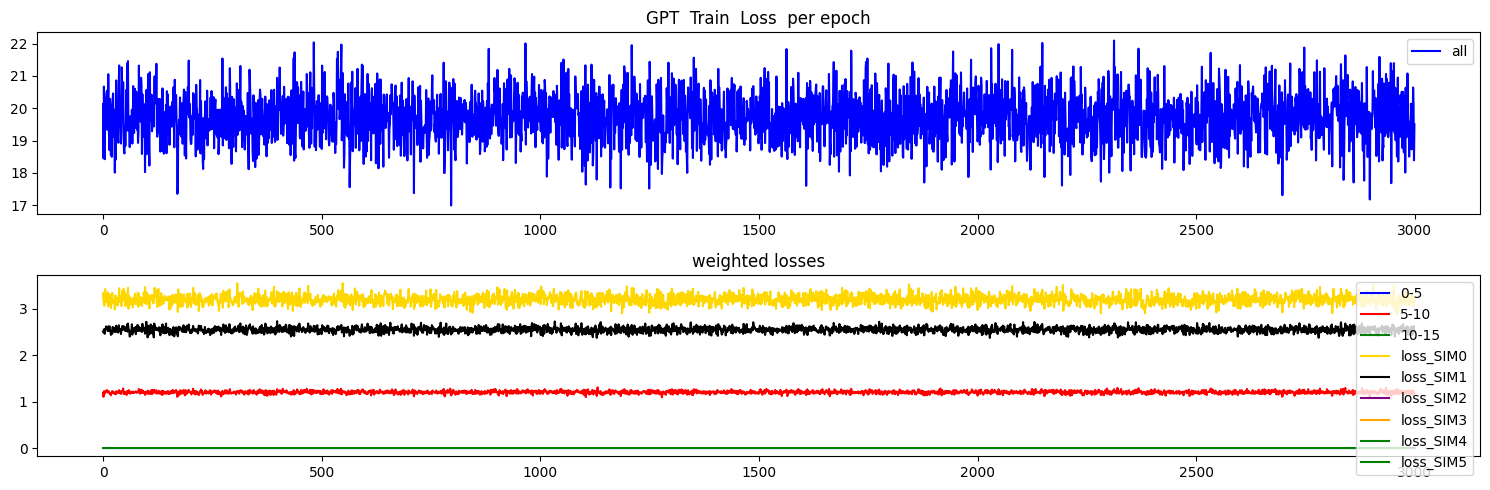

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.07391137629747391
Test MSE Loss - SI only 0-5:  0.1335732489824295
Test MSE Loss - SI only 5-10:  0.2408638298511505
Test MSE Loss - SI only 10-15:  0.07357354462146759
mae, mse, rmse, mape, mspe, rse, corr
(0.19139722, 0.073911384, 0.27186647, 3.517166, 159.25786, 1.241938)
Testing R**2 - SI only:  -0.5424098385331737
Testing R**2 - SI only:  -0.5424098385331737
Testing R**2 - All features:  0.9288578304937752
Testing R**2 - (f2) - SI full:  -1.1314509771607337


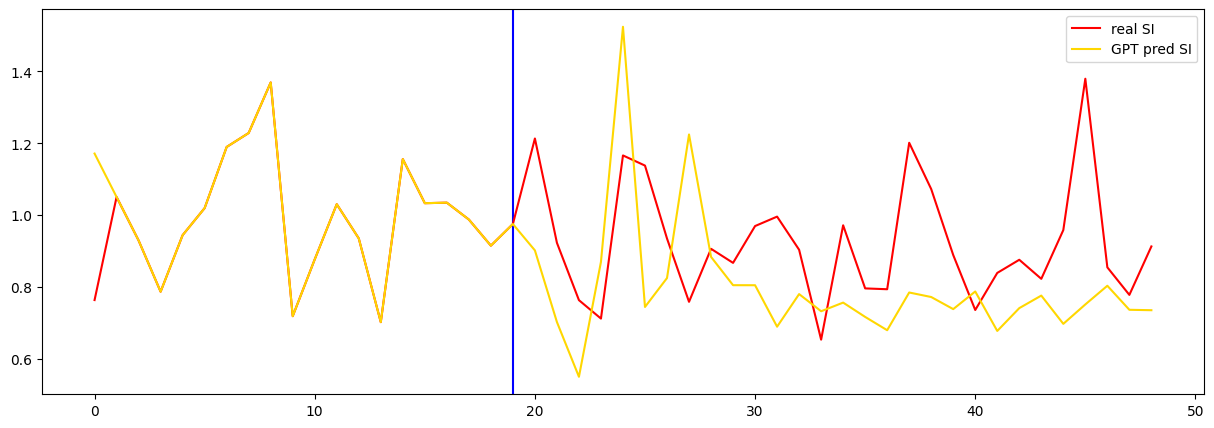

In [40]:

inferenceGPT_obj.the_offset = 60
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 075 to 090


0 train loss =  17.655725479125977
seq length of pred =  30
[ 4.49025819  2.53654755 15.72921189 26.68669224  0.72770235  0.46840818]
[tensor(1.4554, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3694, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  15.539774894714355
seq length of pred =  30
[ 4.53081304  2.47953533 15.60621024 25.76809072  0.70871816  0.45490152]
[tensor(1.4174, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2817, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  16.383216857910156
seq length of pred =  30
[ 4.52607881  2.59763685 15.64298218 25.94276669  0.71650609  0.4578822 ]
[tensor(1.4330, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3653, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  17.5380859375
seq length of pred =  30
[ 4.5304209   2.57323189 15.87522015 26.99767391  0.7287435   0.47351266]
[tensor(1.4575, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3116, device='cuda:0'

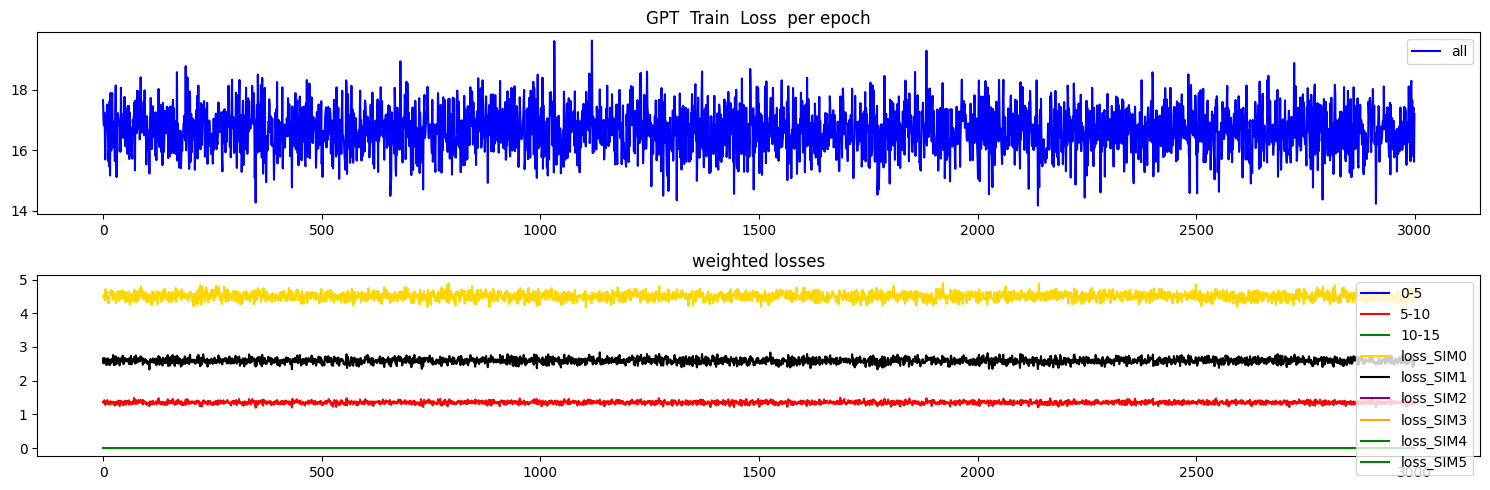

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.08061433583498001
Test MSE Loss - SI only 0-5:  0.21166054904460907
Test MSE Loss - SI only 5-10:  0.03862132504582405
Test MSE Loss - SI only 10-15:  0.11410672962665558
mae, mse, rmse, mape, mspe, rse, corr
(0.20338887, 0.080614336, 0.28392664, 2.276723, 42.599728, 1.3533322)
Testing R**2 - SI only:  -0.8315077637332726
Testing R**2 - SI only:  -0.8315077637332726
Testing R**2 - All features:  0.9843942570023628
Testing R**2 - (f2) - SI full:  -0.5624673988056372


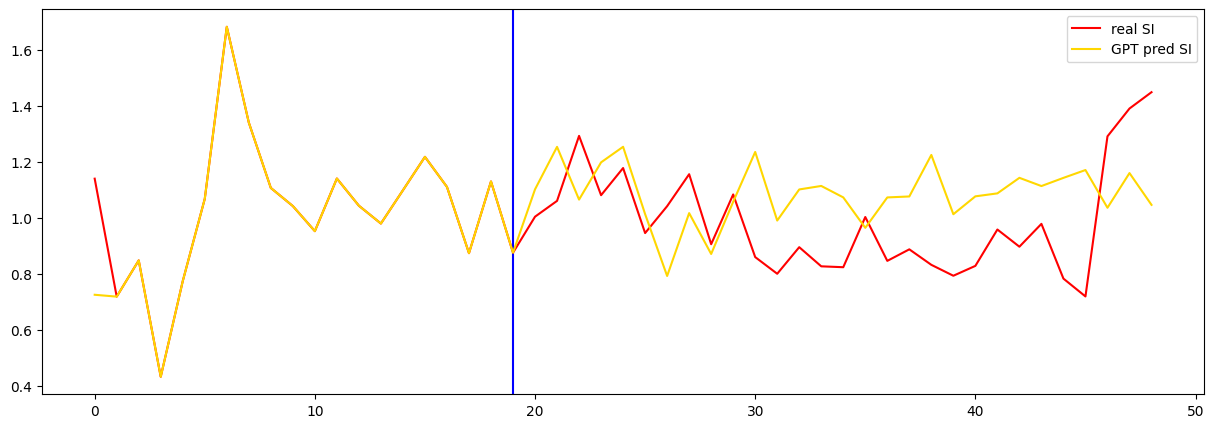

In [41]:

inferenceGPT_obj.the_offset = 75
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 090 to 105


0 train loss =  12.822338104248047
seq length of pred =  30
[ 4.50238898  2.05584344 13.66692844 24.80743455  0.62416147  0.44077583]
[tensor(1.2483, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4415, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  13.07663345336914
seq length of pred =  30
[ 4.52682465  2.07204112 14.53291401 25.18119838  0.63023621  0.44570109]
[tensor(1.2605, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4381, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  12.832509994506836
seq length of pred =  30
[ 4.47117473  2.04940481 14.33850541 25.11912241  0.64977261  0.44962609]
[tensor(1.2995, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4438, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  12.84572696685791
seq length of pred =  30
[ 4.33440594  2.02935337 15.31543441 25.86666635  0.67343021  0.45757004]
[tensor(1.3469, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4474, device='cuda

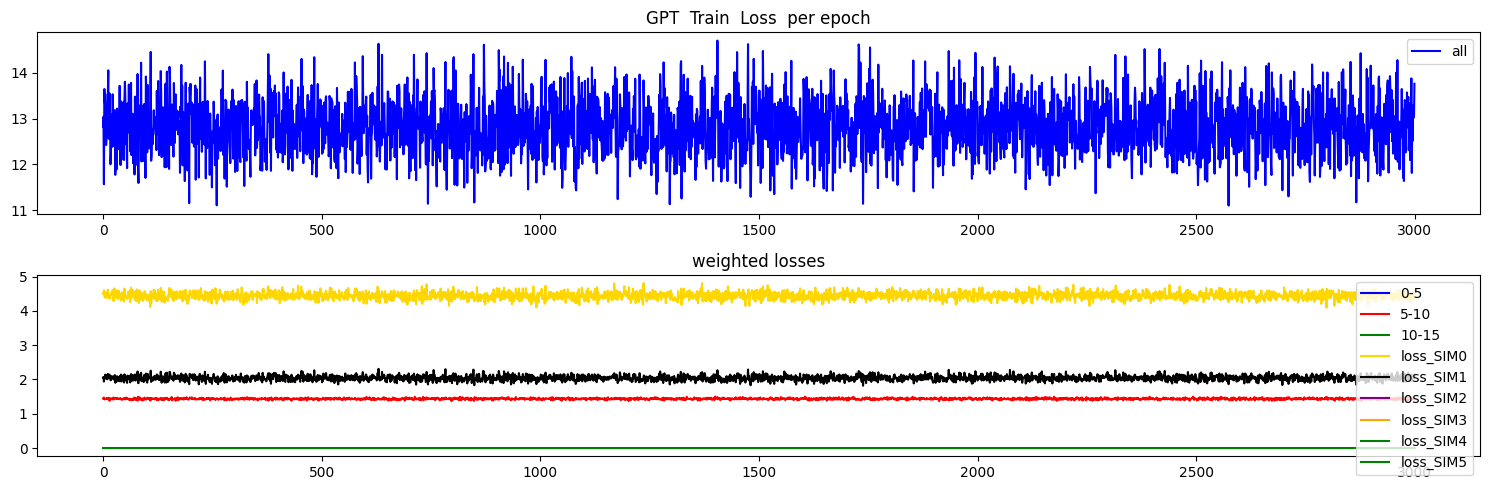

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.0816308930516243
Test MSE Loss - SI only 0-5:  0.07633031159639359
Test MSE Loss - SI only 5-10:  0.05545998364686966
Test MSE Loss - SI only 10-15:  0.4357689917087555
mae, mse, rmse, mape, mspe, rse, corr
(0.2008449, 0.08163089, 0.2857112, 12.132748, 2989.2002, 1.443802)
Testing R**2 - SI only:  -1.0845642062194134
Testing R**2 - SI only:  -1.0845642062194134
Testing R**2 - All features:  0.9924246132554827
Testing R**2 - (f2) - SI full:  -0.39823234739156854


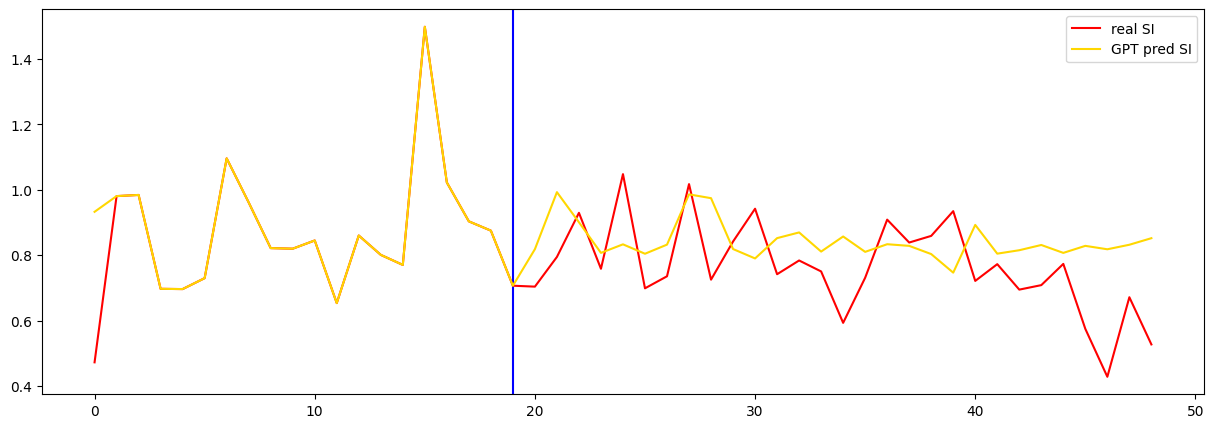

In [42]:

inferenceGPT_obj.the_offset = 90
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## Save excel to csv


In [43]:
 
inferenceGPT_obj.save_Excel_to_CSV()



## Add the dates ( ??) 


In [44]:

tsDataWrangling_obj.add_dates_after_GPT_is_trained( tsGPT_obj )
